In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, ttest_ind  


In [3]:
electronic_df = pd.read_csv('electronic_sales.csv')


In [69]:
electronic_df.head(3)


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,3/20/2024,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,4/20/2024,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,10/17/2023,Express,NaN,0.00


DATA CLEANING

In [4]:
placeholder_values = ["", " "]

electronic_df.replace(placeholder_values, np.nan, inplace=True)

print("\nMissing Values Before Cleaning:")
missing_before = electronic_df.isnull().sum()
print(missing_before)



Missing Values Before Cleaning:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


In [5]:
electronic_df['Gender'].fillna(electronic_df['Gender'].mode()[0], inplace=True)

In [6]:
electronic_df['Add-ons Purchased'].fillna("None", inplace=True)


In [7]:
print("Missing values after cleaning:\n", electronic_df.isnull().sum())

Missing values after cleaning:
 Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64


RESEARCH QUESTION 01 ANALYSIS


Correlation Matrix between Total Price and Other Variables:
              Total Price  Quantity       Age  Add-on Total
Total Price      1.000000  0.653872  0.003096      0.083924
Quantity         0.653872  1.000000  0.008555      0.003419
Age              0.003096  0.008555  1.000000     -0.005291
Add-on Total     0.083924  0.003419 -0.005291      1.000000


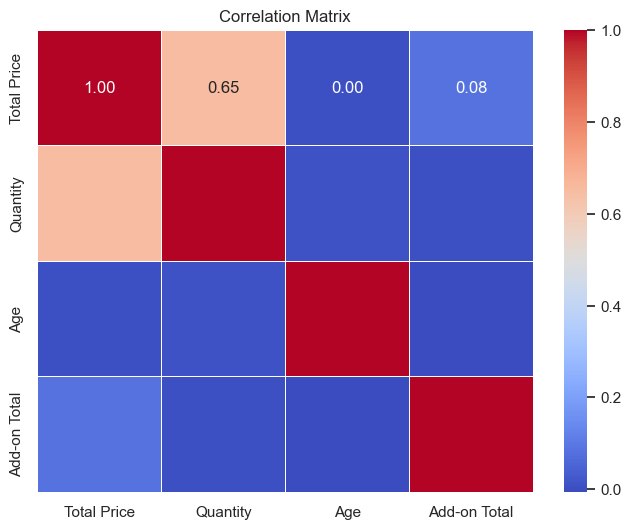

In [83]:
correlation_matrix = electronic_df[['Total Price', 'Quantity', 'Age', 'Add-on Total']].corr()

print("\nCorrelation Matrix between Total Price and Other Variables:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


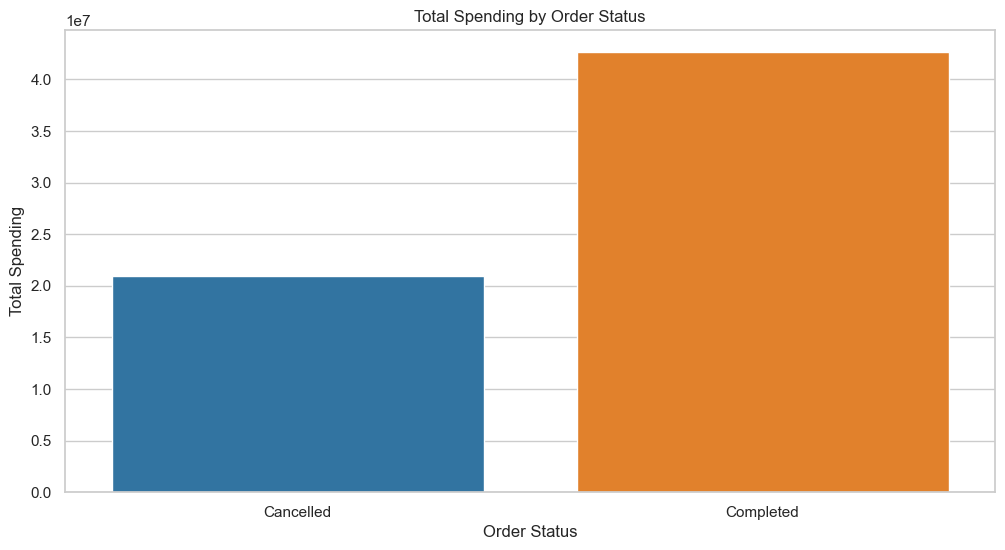

In [84]:
order_status_stats = electronic_df.groupby('Order Status')['Total Price'].sum().reset_index()
order_status_stats.columns = ['Order Status', 'Total Spending']

plt.figure(figsize=(12, 6))
sns.barplot(x='Order Status', y='Total Spending', data=order_status_stats)
plt.title('Total Spending by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Spending')
plt.show()


In [85]:
from scipy import stats

groups = [group['Total Price'].values for name, group in electronic_df.groupby('Shipping Type')]
f_stat, p_value = stats.f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Result: Shipping Type significantly affects total spending (Reject H0).")
else:
    print("Result: No significant difference in total spending across Shipping Types (Fail to reject H0).")


ANOVA F-statistic: 194.513, P-value: 0.000
Result: Shipping Type significantly affects total spending (Reject H0).


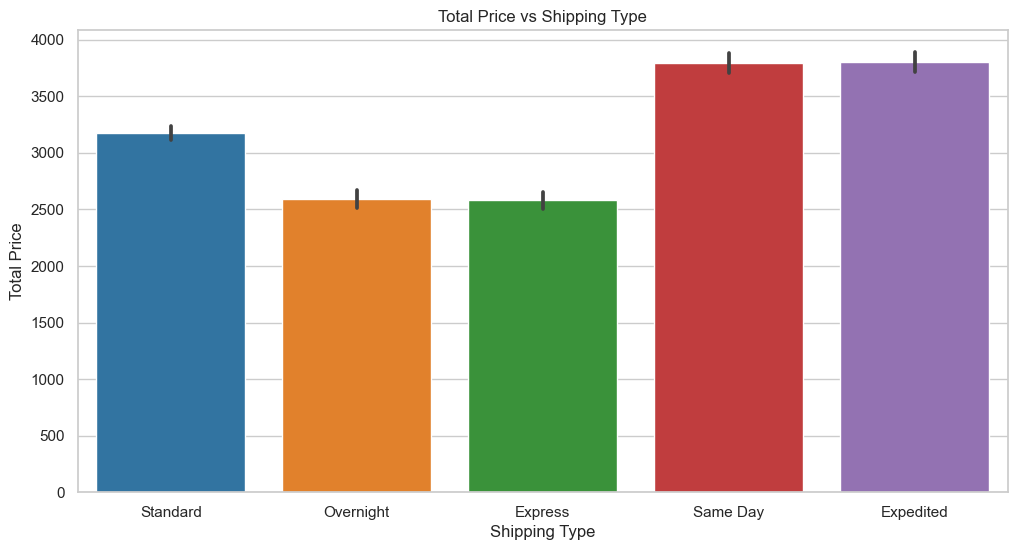

In [86]:
shipping_type_stats = electronic_df['Shipping Type'].value_counts().reset_index()
shipping_type_stats.columns = ['Shipping Type', 'Transaction Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Type', y='Total Price', data=electronic_df)
plt.title('Total Price vs Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Total Price')
plt.show()


In [87]:
add_on_total = electronic_df['Add-on Total'].sum()
total_spending = electronic_df['Total Price'].sum()
print(f"Total spending from add-ons: {add_on_total} out of {total_spending}")


Total spending from add-ons: 1244896.96 out of 63602668.370000005


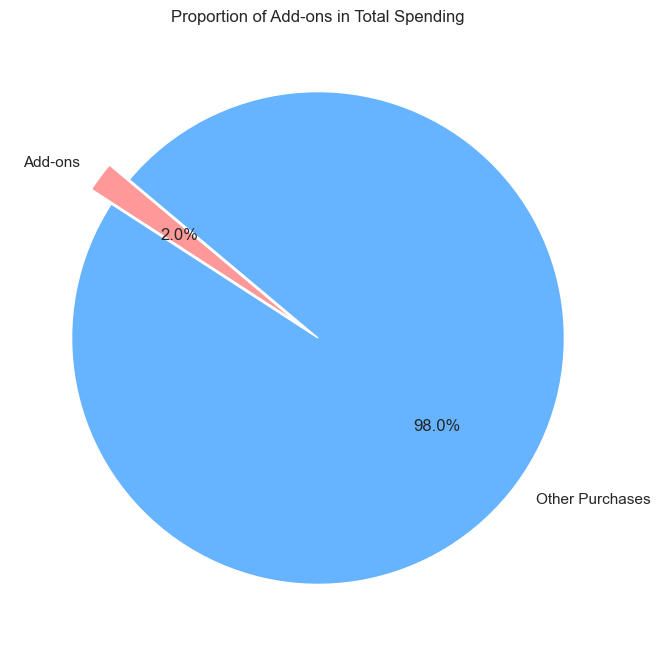

In [88]:
add_on_total = electronic_df['Add-on Total'].sum()
total_spending = electronic_df['Total Price'].sum()

labels = ['Add-ons', 'Other Purchases']
sizes = [add_on_total, total_spending - add_on_total]
explode = (0.1, 0)  
colors = ['#ff9999', '#66b3ff'] 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Add-ons in Total Spending')
plt.show()

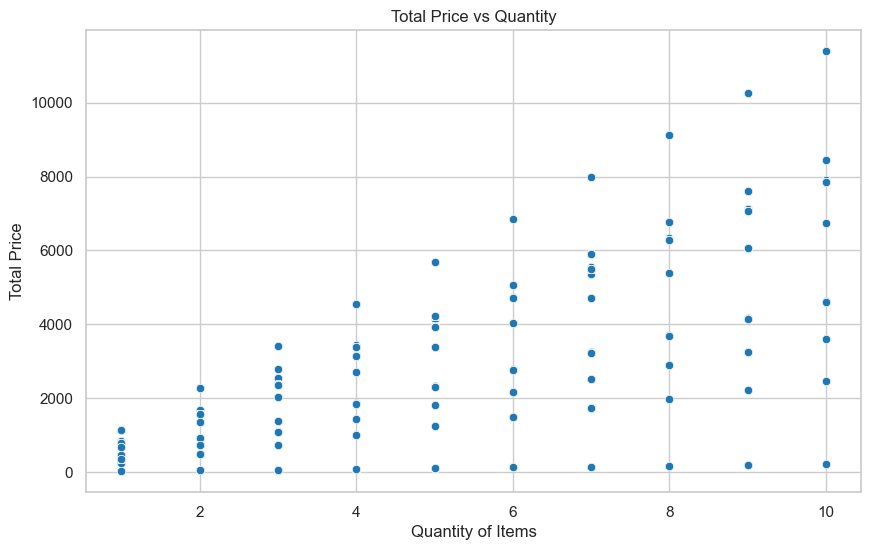

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Price', data=electronic_df)
plt.title('Total Price vs Quantity')
plt.xlabel('Quantity of Items')
plt.ylabel('Total Price')
plt.show()


------------------ NEW ANALYSIS BLOCK (1) ---------------------------

CUSTOMER DEMOGRAPHICS AND BEHAVIOUR

Age Distribution

1.1 Identifying Age Groups and Trends

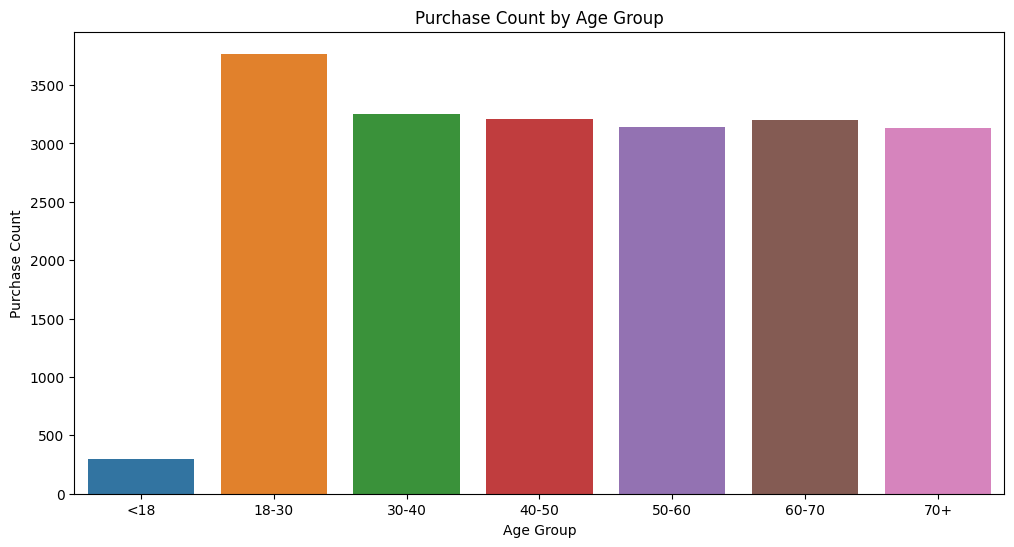

In [20]:
age_bins = [0, 18, 30, 40, 50, 60, 70, 100]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70+']
electronic_df['Age Group'] = pd.cut(electronic_df['Age'], bins=age_bins, labels=age_labels)

age_group_stats = electronic_df.groupby('Age Group')['Total Price'].agg(['count', 'sum']).reset_index()
age_group_stats.columns = ['Age Group', 'Purchase Count', 'Total Revenue']

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Purchase Count', data=age_group_stats)
plt.title('Purchase Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Count')
plt.show()



Gender Analysis

Spending Behavior by Gender

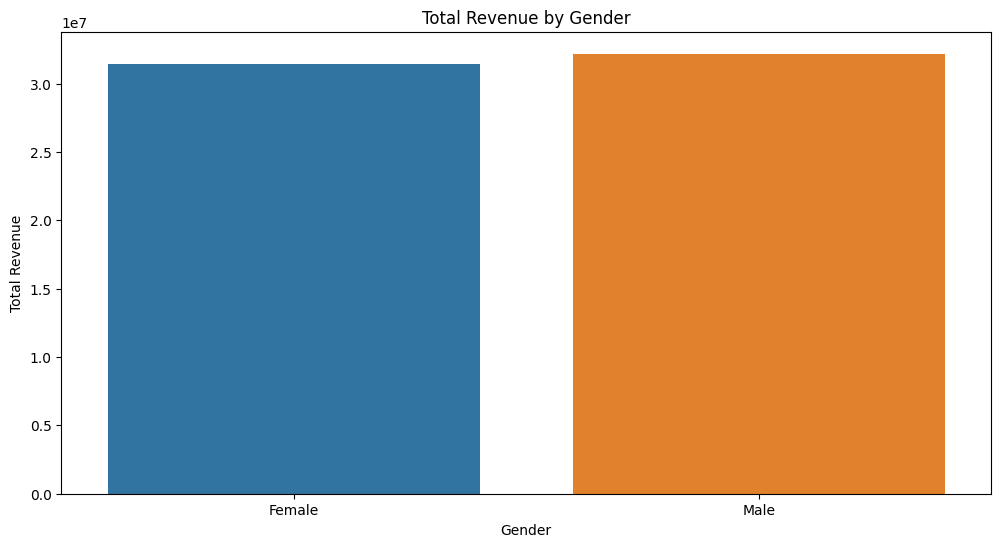

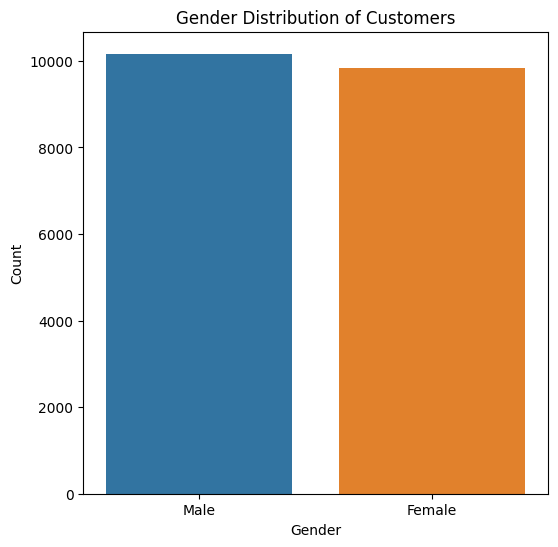

In [21]:
gender_stats = electronic_df.groupby('Gender')['Total Price'].agg(['mean', 'sum', 'count']).reset_index()
gender_stats.columns = ['Gender', 'Average Spending', 'Total Revenue', 'Purchase Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Total Revenue', data=gender_stats)
plt.title('Total Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(data=electronic_df, x='Gender')
plt.title("Gender Distribution of Customers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

T-test for Gender-Based Average Spending Comparison 

In [22]:
male_spending = electronic_df[electronic_df['Gender'] == 'Male']['Total Price']
female_spending = electronic_df[electronic_df['Gender'] == 'Female']['Total Price']
t_stat, p_value = ttest_ind(male_spending, female_spending, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in spending between genders.")
else:
    print("There is no significant difference in spending between genders.")


T-statistic: -0.7589017829744155
P-value: 0.4479202701682997
There is no significant difference in spending between genders.


Product Preferences by Gender

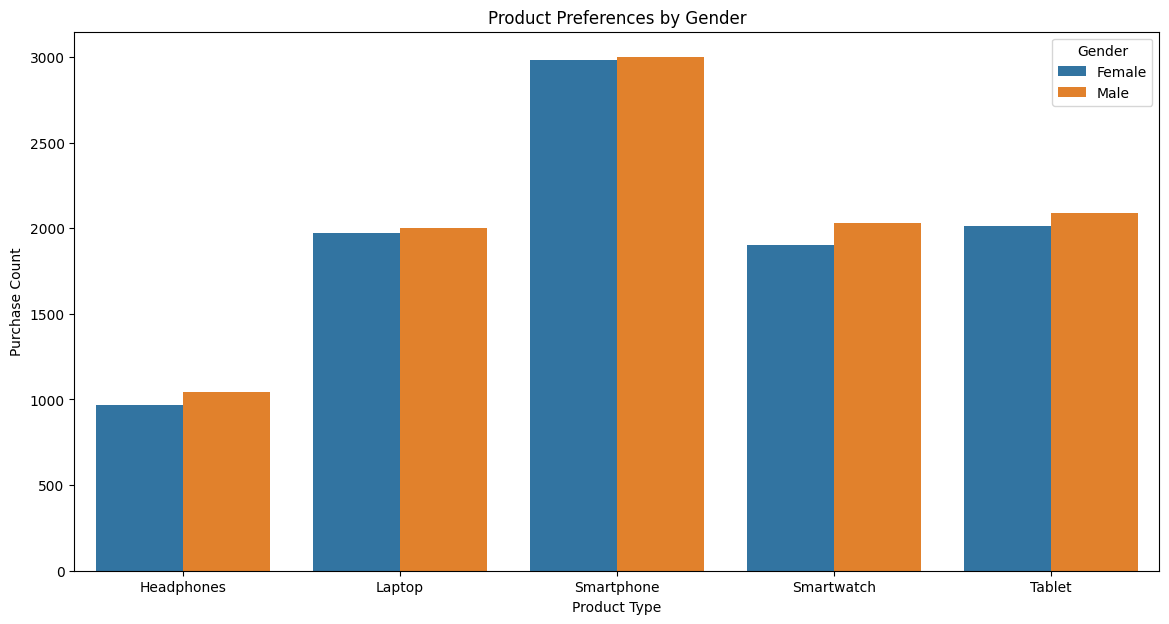

In [23]:
gender_product_preferences = electronic_df.groupby(['Gender', 'Product Type']).size().reset_index(name='Purchase Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Product Type', y='Purchase Count', hue='Gender', data=gender_product_preferences)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Type')
plt.ylabel('Purchase Count')
plt.legend(title='Gender')
plt.show()


Loyalty Membership Trends

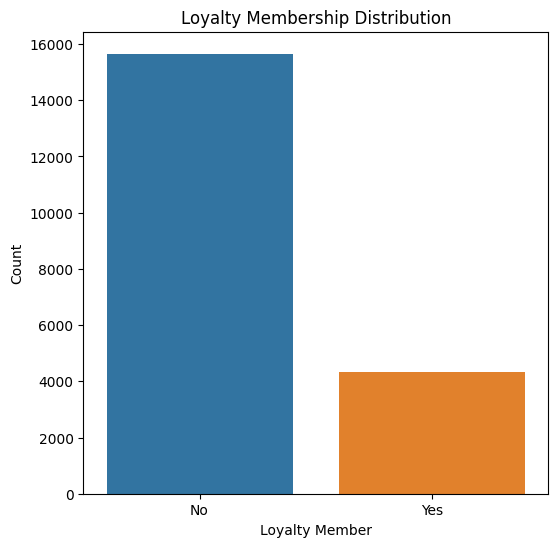

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(data=electronic_df, x='Loyalty Member')
plt.title("Loyalty Membership Distribution")
plt.xlabel("Loyalty Member")
plt.ylabel("Count")
plt.show()

Membership Over Time

<Figure size 1200x600 with 0 Axes>

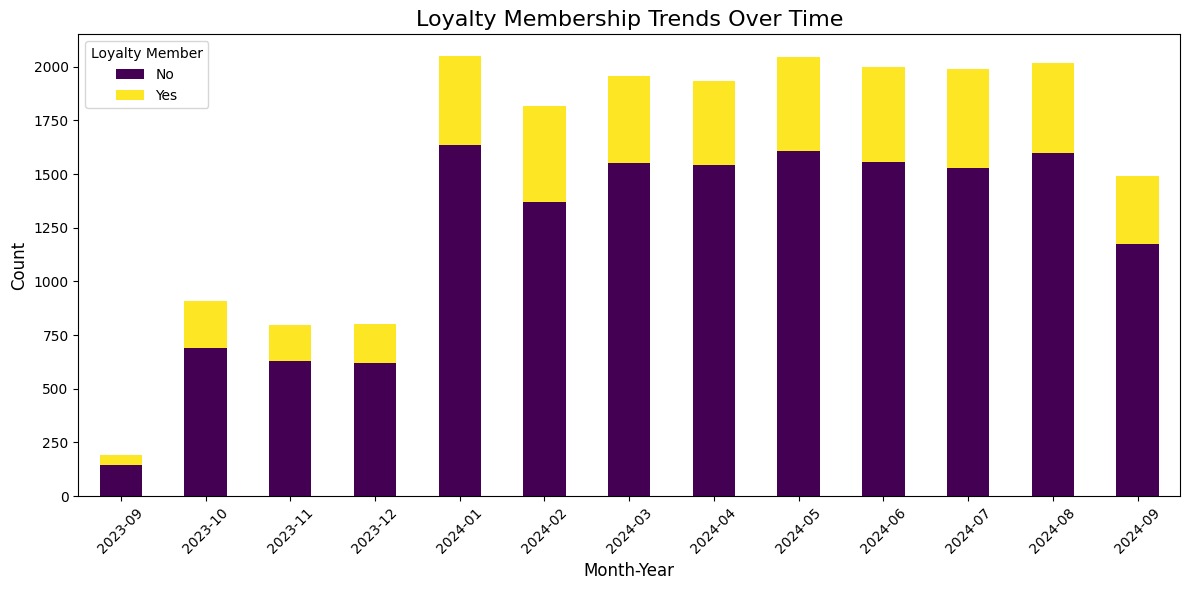

In [12]:
electronic_df['Purchase Date'] = pd.to_datetime(electronic_df['Purchase Date'], errors='coerce')

electronic_df['Month-Year'] = electronic_df['Purchase Date'].dt.to_period('M')

loyalty_trend = electronic_df.groupby(['Month-Year', 'Loyalty Member']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
loyalty_trend.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Loyalty Membership Trends Over Time", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loyalty Member", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [13]:
contingency_table = loyalty_trend.T 
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Test: p-value = {p}")
if p < 0.05:
    print("There is a significant association between loyalty membership and time.")
else:
    print("There is no significant association between loyalty membership and time.")

loyalty_spending = electronic_df.groupby('Loyalty Member')['Total Price'].mean()

loyal_members = electronic_df[electronic_df['Loyalty Member'] == 'Yes']['Total Price']
non_loyal_members = electronic_df[electronic_df['Loyalty Member'] == 'No']['Total Price']

t_stat, p_value = stats.ttest_ind(loyal_members, non_loyal_members)

print(f"T-test: p-value = {p_value}")
if p_value < 0.05:
    print("There is a significant difference in the average spending between loyalty and non-loyalty members.")
else:
    print("There is no significant difference in the average spending between loyalty and non-loyalty members.")


Chi-Squared Test: p-value = 0.01905763127424714
There is a significant association between loyalty membership and time.
T-test: p-value = 0.21153197763369752
There is no significant difference in the average spending between loyalty and non-loyalty members.


Spending Patterns by Loyalty Members vs non loyalty members

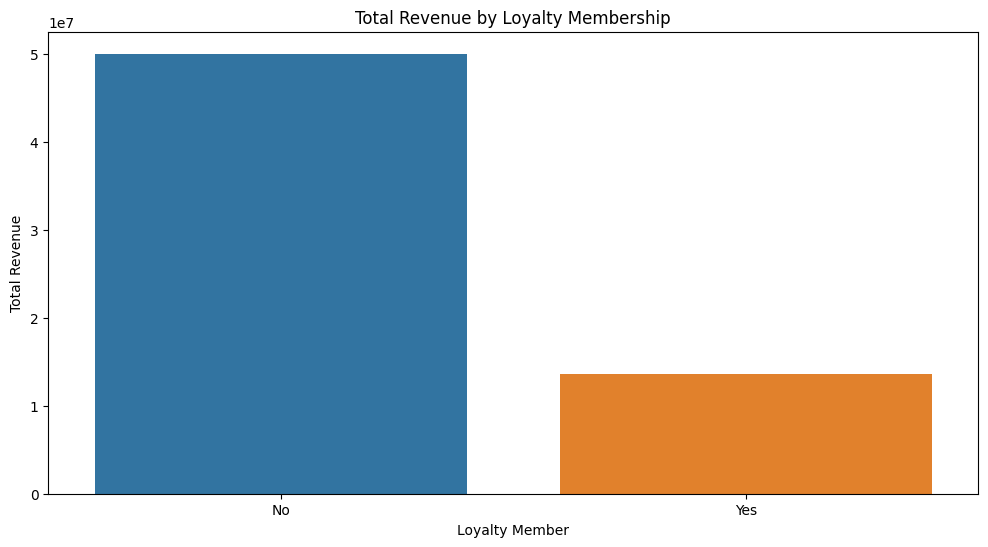

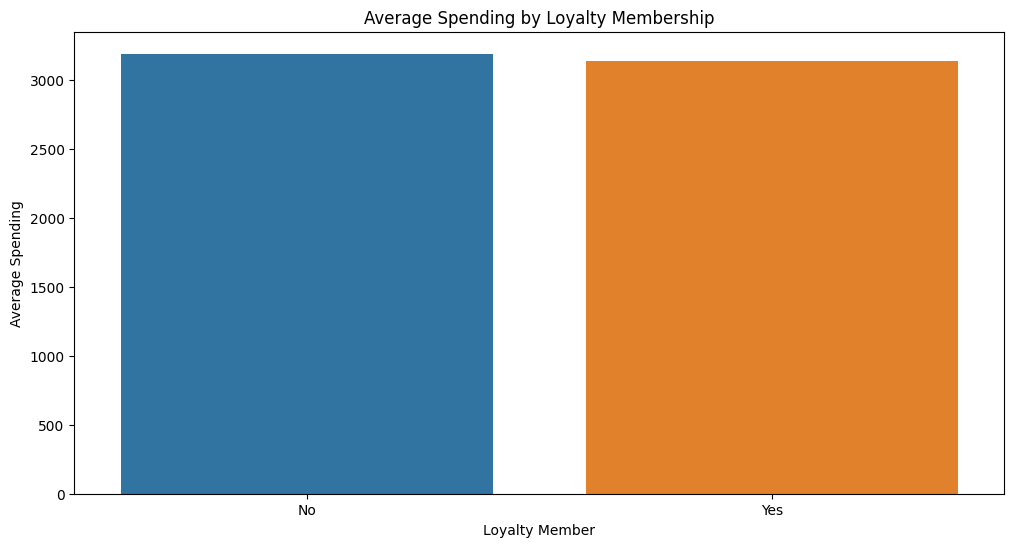

In [27]:
loyalty_spending = electronic_df.groupby('Loyalty Member')['Total Price'].agg(['mean', 'sum', 'count']).reset_index()
loyalty_spending.columns = ['Loyalty Member', 'Average Spending', 'Total Revenue', 'Purchase Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Loyalty Member', y='Total Revenue', data=loyalty_spending)
plt.title('Total Revenue by Loyalty Membership')
plt.xlabel('Loyalty Member')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Loyalty Member', y='Average Spending', data=loyalty_spending)
plt.title('Average Spending by Loyalty Membership')
plt.xlabel('Loyalty Member')
plt.ylabel('Average Spending')
plt.show()


In [89]:

loyal_revenue = electronic_df[electronic_df['Loyalty Member'] == 'Yes']['Total Price']
non_loyal_revenue = electronic_df[electronic_df['Loyalty Member'] == 'No']['Total Price']

t_stat_revenue, p_value_revenue = stats.ttest_ind(loyal_revenue, non_loyal_revenue)

print(f"T-test for Total Revenue: p-value = {p_value_revenue}")
if p_value_revenue < 0.05:
    print("There is a significant difference in total revenue between loyalty and non-loyalty members.")
else:
    print("There is no significant difference in total revenue between loyalty and non-loyalty members.")

t_stat_spending, p_value_spending = stats.ttest_ind(loyal_members, non_loyal_members)

print(f"T-test for Average Spending: p-value = {p_value_spending}")
if p_value_spending < 0.05:
    print("There is a significant difference in average spending between loyalty and non-loyalty members.")
else:
    print("There is no significant difference in average spending between loyalty and non-loyalty members.")


T-test for Total Revenue: p-value = 0.21153197763369752
There is no significant difference in total revenue between loyalty and non-loyalty members.
T-test for Average Spending: p-value = 0.21153197763369752
There is no significant difference in average spending between loyalty and non-loyalty members.


------------------ NEW ANALYSIS BLOCK (2)------------------------------

2) Product Type Preferences

Analyzing purchase count and total revenue of each Product Types


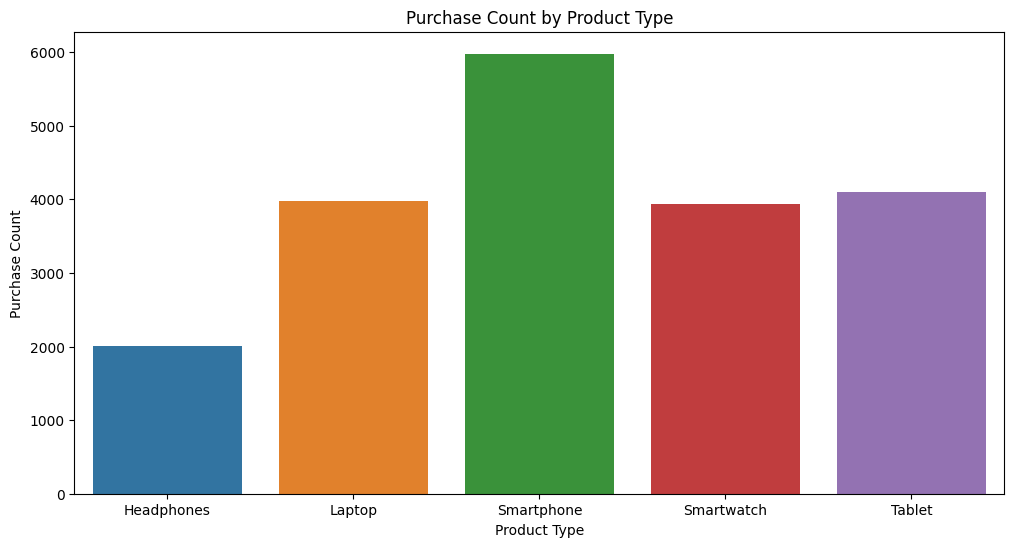

In [30]:
product_type_stats = electronic_df.groupby('Product Type')['Total Price'].agg(['count', 'sum']).reset_index()
product_type_stats.columns = ['Product Type', 'Purchase Count', 'Total Revenue']

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Purchase Count', data=product_type_stats)
plt.title('Purchase Count by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Purchase Count')
plt.show()



Product preferences by age group , by gender, by loyalty membership

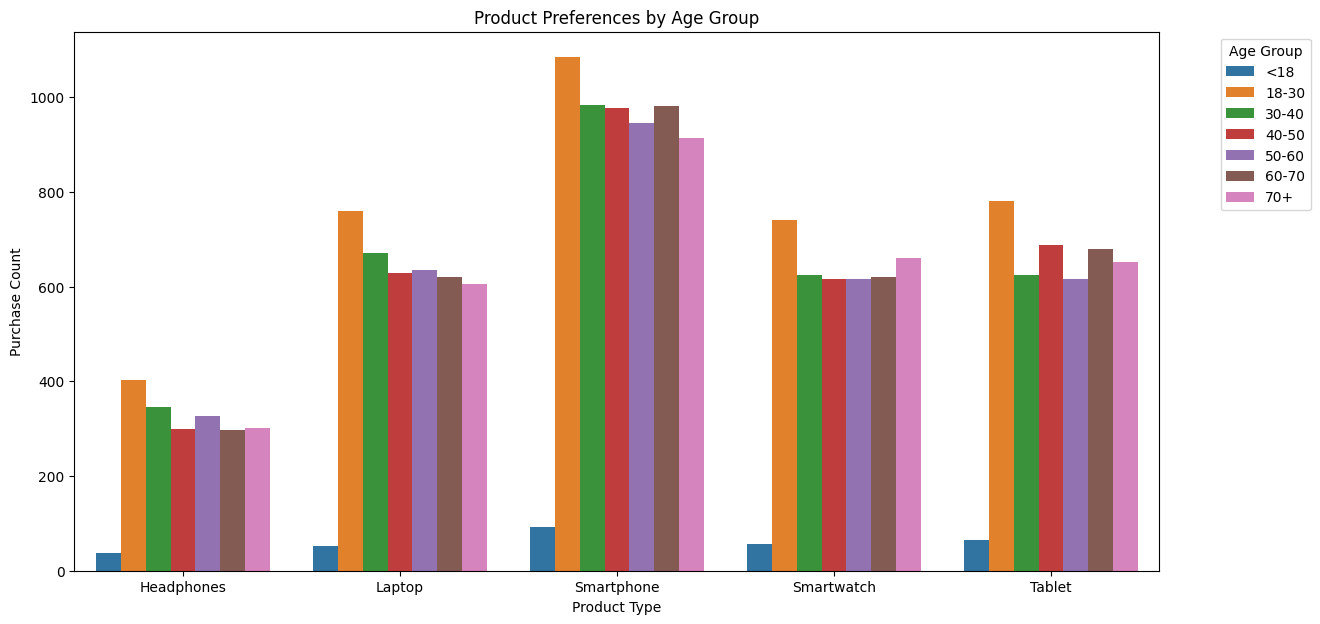

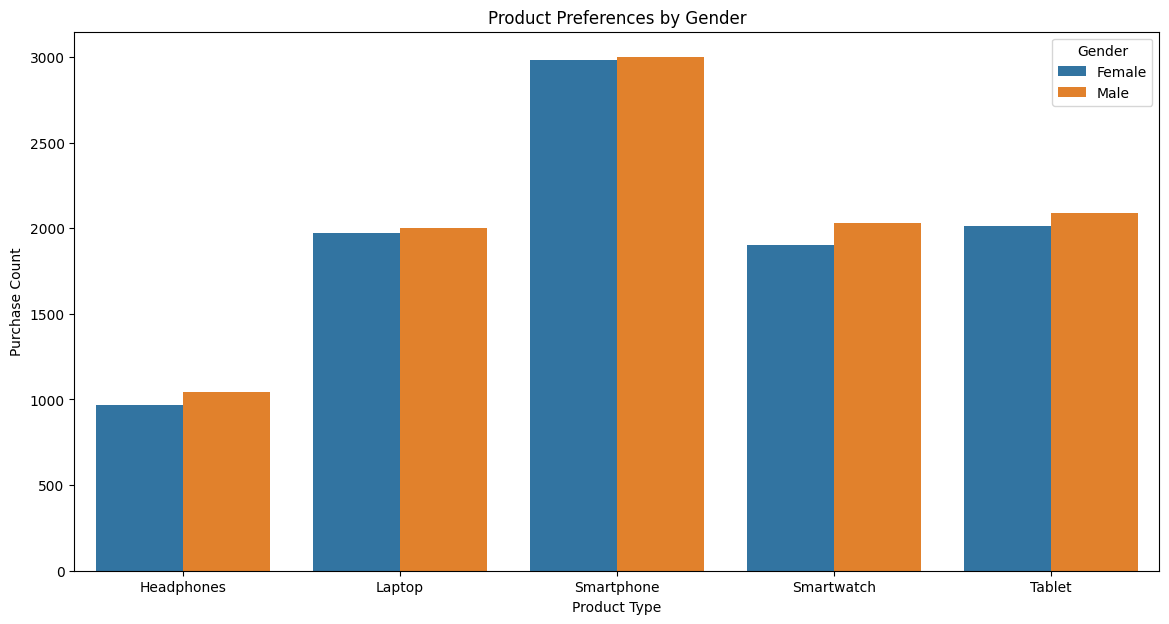

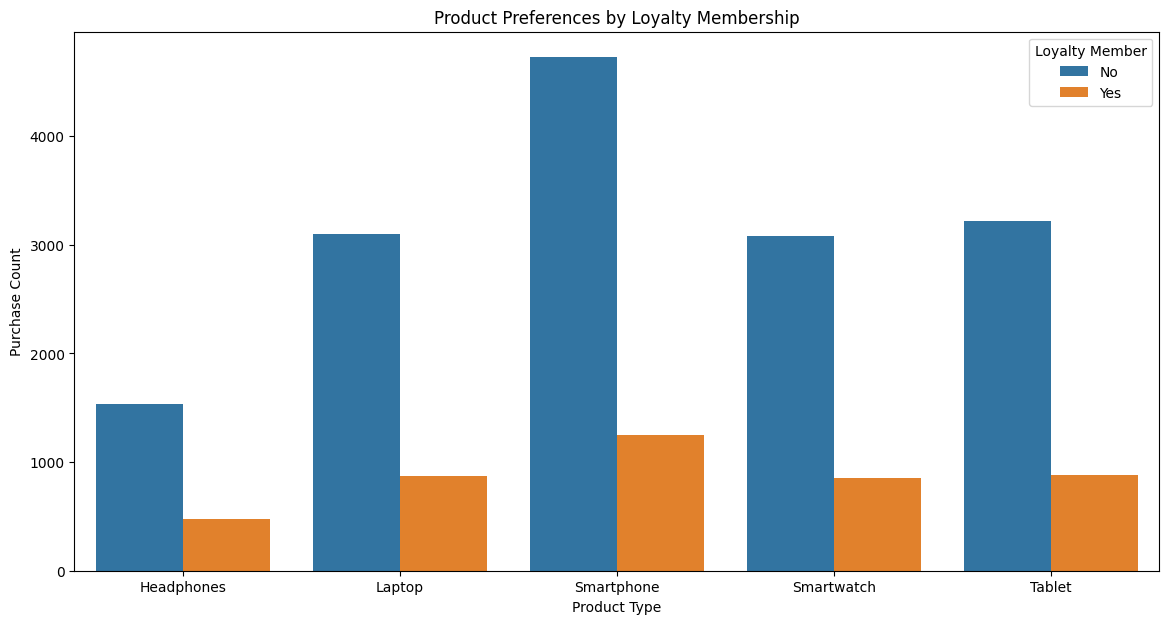

In [31]:
age_product_preferences = electronic_df.groupby(['Age Group', 'Product Type']).size().reset_index(name='Purchase Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Product Type', y='Purchase Count', hue='Age Group', data=age_product_preferences)
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Type')
plt.ylabel('Purchase Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

gender_product_preferences = electronic_df.groupby(['Gender', 'Product Type']).size().reset_index(name='Purchase Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Product Type', y='Purchase Count', hue='Gender', data=gender_product_preferences)
plt.title('Product Preferences by Gender')
plt.xlabel('Product Type')
plt.ylabel('Purchase Count')
plt.legend(title='Gender')
plt.show()

loyalty_product_preferences = electronic_df.groupby(['Loyalty Member', 'Product Type']).size().reset_index(name='Purchase Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Product Type', y='Purchase Count', hue='Loyalty Member', data=loyalty_product_preferences)
plt.title('Product Preferences by Loyalty Membership')
plt.xlabel('Product Type')
plt.ylabel('Purchase Count')
plt.legend(title='Loyalty Member')
plt.show()


SKU Performance

Top-Performing SKUs by Revenue

Product Type Popularity Over Time

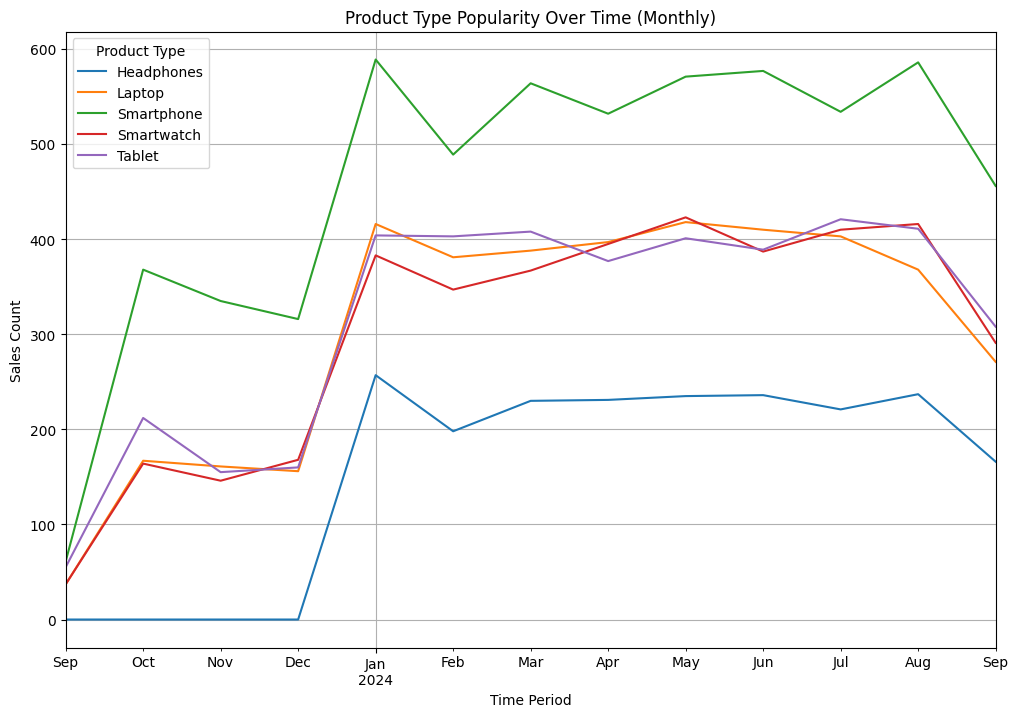

In [32]:
def product_type_popularity_over_time(electronic_df, freq='M'):
    
    trends = electronic_df.groupby([electronic_df['Purchase Date'].dt.to_period(freq), 'Product Type']).size().unstack(fill_value=0)
    
    
    trends.plot(kind='line', figsize=(12, 8))
    plt.title(f"Product Type Popularity Over Time ({'Monthly' if freq == 'M' else 'Quarterly'})")
    plt.xlabel("Time Period")
    plt.ylabel("Sales Count")
    plt.legend(title="Product Type")
    plt.grid(True)
    plt.show()


product_type_popularity_over_time(electronic_df, freq='M')

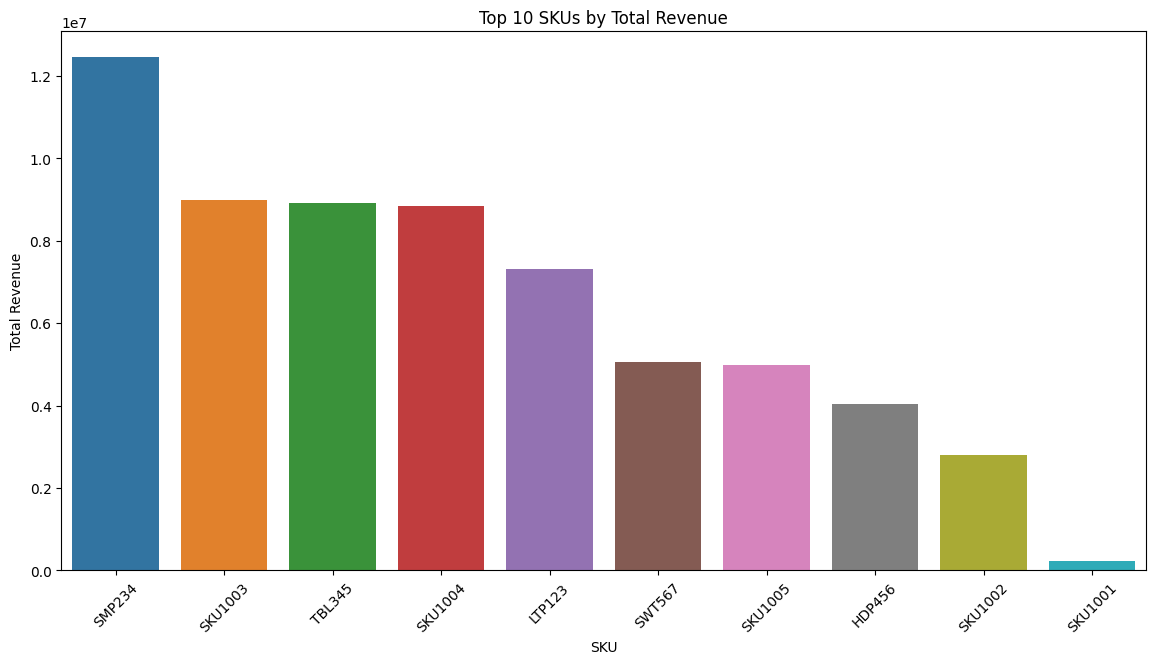

In [33]:
sku_stats = electronic_df.groupby('SKU')['Total Price'].agg(['count', 'sum']).reset_index()
sku_stats.columns = ['SKU', 'Purchase Count', 'Total Revenue']

top_skus = sku_stats.sort_values(by='Total Revenue', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='SKU', y='Total Revenue', data=top_skus)
plt.title('Top 10 SKUs by Total Revenue')
plt.xlabel('SKU')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


 Identify SKUs Frequently Purchased with Add-ons

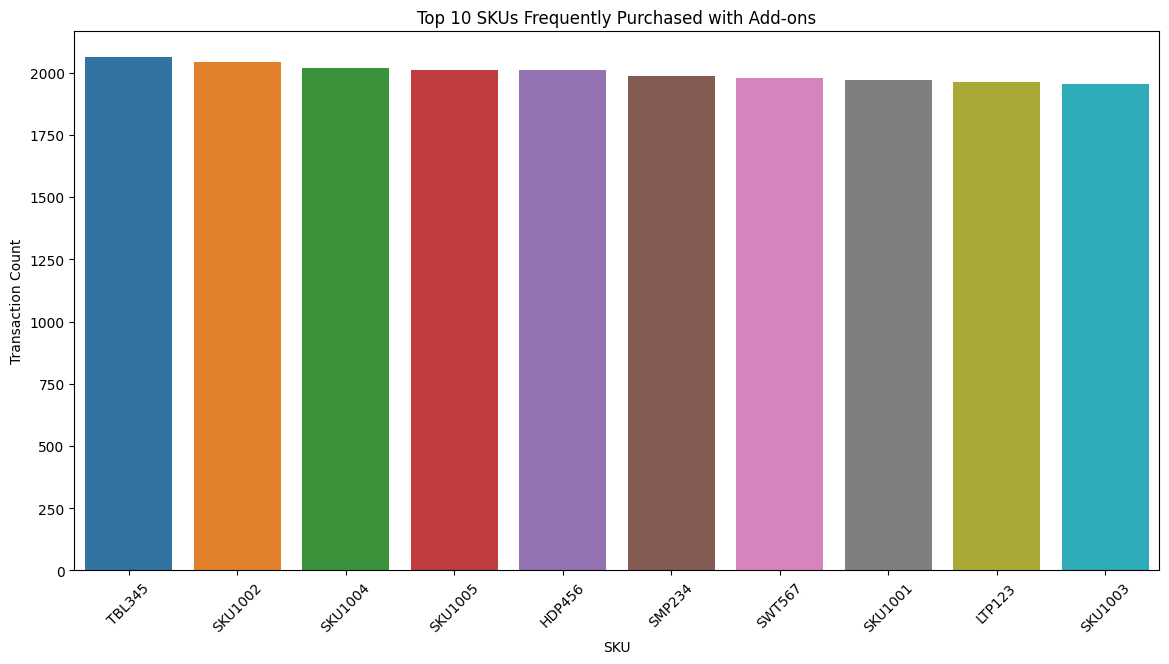

In [34]:
electronic_df['Has Add-ons'] = electronic_df['Add-ons Purchased'].notna()
sku_addon_stats = electronic_df.groupby(['SKU', 'Has Add-ons']).size().reset_index(name='Transaction Count')
top_addon_skus = sku_addon_stats[sku_addon_stats['Has Add-ons']].sort_values(by='Transaction Count', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='SKU', y='Transaction Count', data=top_addon_skus)
plt.title('Top 10 SKUs Frequently Purchased with Add-ons')
plt.xlabel('SKU')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()


------------------ NEW ANALYSIS BLOCK (3)------------------------------

3. Ratings and Customer Satisfaction

Average Ratings Across Product Types and SKUs

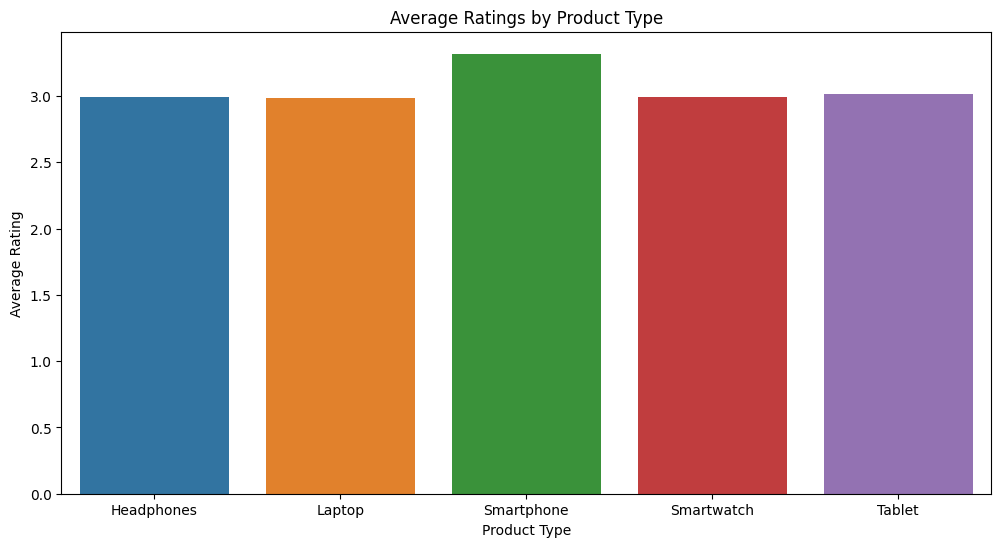

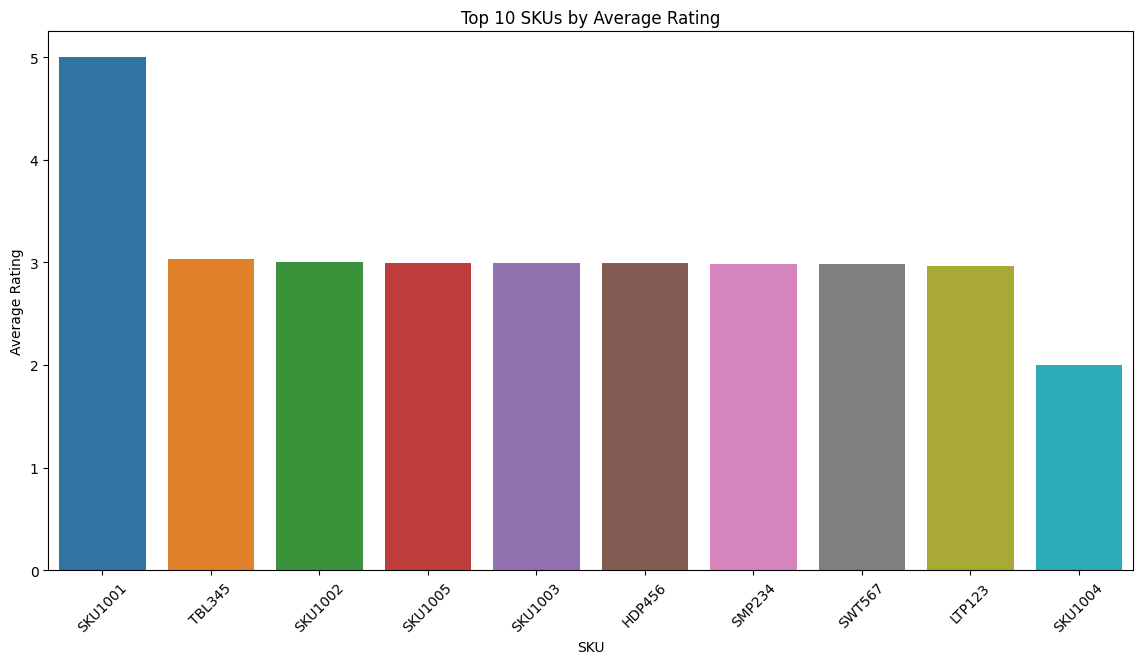

In [35]:
product_rating_stats = electronic_df.groupby('Product Type')['Rating'].agg(['mean', 'count']).reset_index()
product_rating_stats.columns = ['Product Type', 'Average Rating', 'Number of Ratings']
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Average Rating', data=product_rating_stats)
plt.title('Average Ratings by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Rating')
plt.show()

sku_rating_stats = electronic_df.groupby('SKU')['Rating'].agg(['mean', 'count']).reset_index()
sku_rating_stats.columns = ['SKU', 'Average Rating', 'Number of Ratings']

top_rated_skus = sku_rating_stats.sort_values(by='Average Rating', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='SKU', y='Average Rating', data=top_rated_skus)
plt.title('Top 10 SKUs by Average Rating')
plt.xlabel('SKU')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

Correlate Ratings with Other Factors

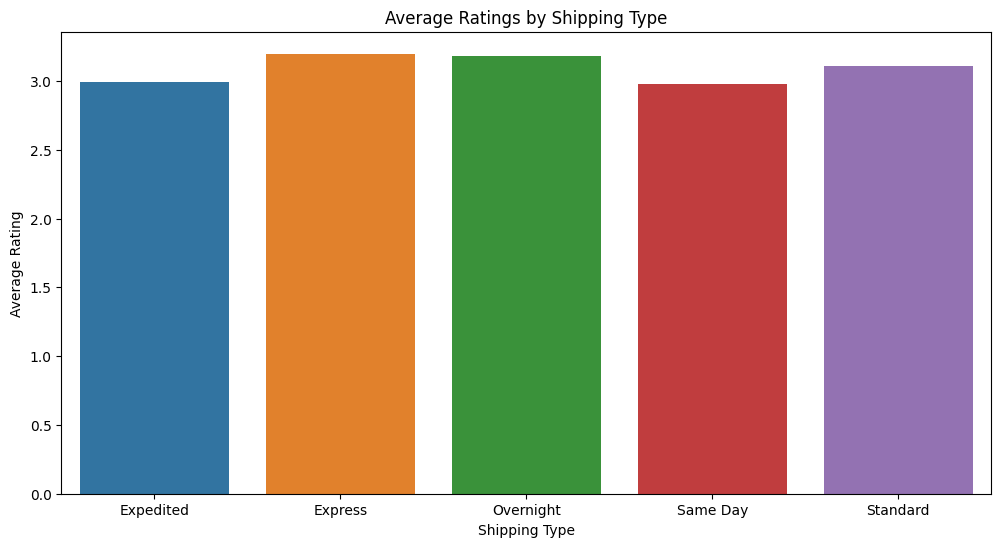

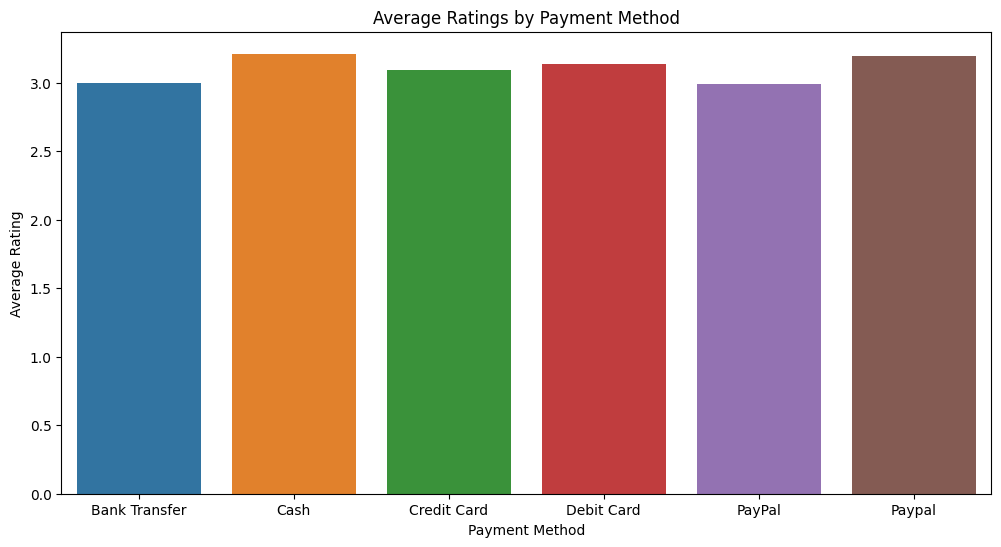

In [36]:
shipping_rating_stats = electronic_df.groupby('Shipping Type')['Rating'].agg(['mean', 'count']).reset_index()
shipping_rating_stats.columns = ['Shipping Type', 'Average Rating', 'Number of Ratings']

plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Type', y='Average Rating', data=shipping_rating_stats)
plt.title('Average Ratings by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Rating')
plt.show()

payment_rating_stats = electronic_df.groupby('Payment Method')['Rating'].agg(['mean', 'count']).reset_index()
payment_rating_stats.columns = ['Payment Method', 'Average Rating', 'Number of Ratings']

plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Average Rating', data=payment_rating_stats)
plt.title('Average Ratings by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Rating')
plt.show()


Relationship with Sales
Correlate Ratings with Purchase Frequency

Correlate Ratings with Purchase Frequency

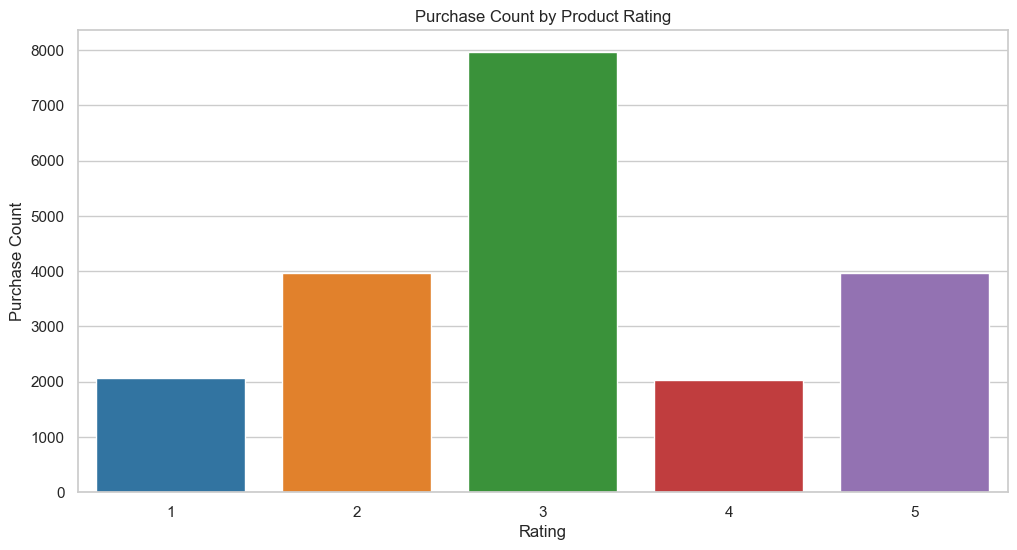

In [90]:
rating_sales_stats = electronic_df.groupby('Rating')['Total Price'].agg(['count', 'sum', 'mean']).reset_index()
rating_sales_stats.columns = ['Rating', 'Purchase Count', 'Total Revenue', 'Average Revenue']

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Purchase Count', data=rating_sales_stats)
plt.title('Purchase Count by Product Rating')
plt.xlabel('Rating')
plt.ylabel('Purchase Count')
plt.show()


Determine if Higher-Rated Products Generate More Revenue
Aggregate Revenue by Product Ratings

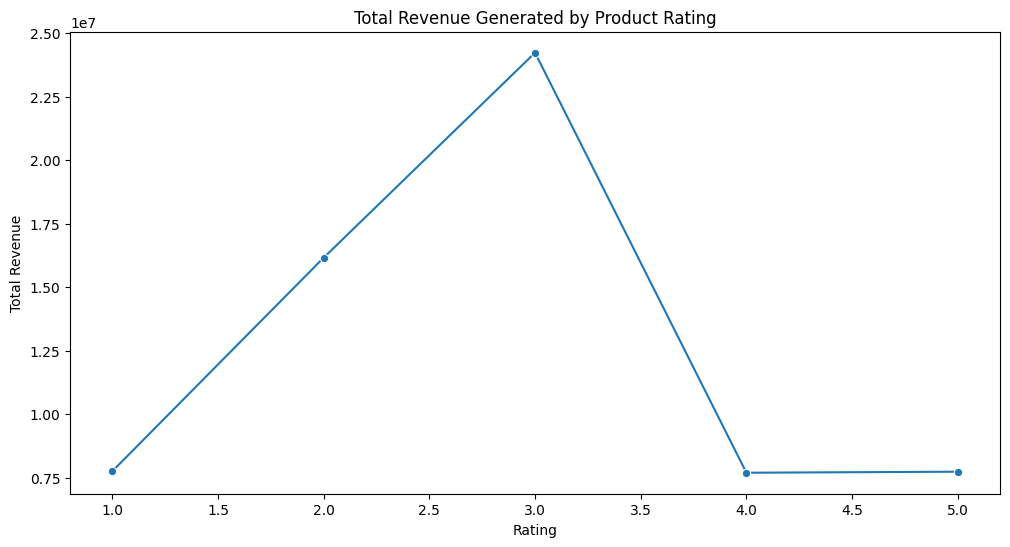

In [38]:
product_rating_revenue = electronic_df.groupby('Rating')['Total Price'].sum().reset_index()
product_rating_revenue.columns = ['Rating', 'Total Revenue']

plt.figure(figsize=(12, 6))
sns.lineplot(x='Rating', y='Total Revenue', data=product_rating_revenue, marker='o')
plt.title('Total Revenue Generated by Product Rating')
plt.xlabel('Rating')
plt.ylabel('Total Revenue')
plt.show()


--------------------------- NEW ANALYSIS BLOCK ( 4 )---------------------------------------------------------------------

4. Sales and Revenue Analysis

Revenue Analysis ( AOV ) ( Average Order Value )

In [39]:
def calculate_aov(df):
    
    age_bins = [18, 30, 40, 50, 60, 80]
    age_labels = ['18-30', '30-40', '40-50', '50-60', '60-80']
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    
    aov_analysis = df.groupby(['Loyalty Member', 'Age Group', 'Product Type']).agg({
        'Total Price': 'mean'
    }).rename(columns={'Total Price': 'Average Order Value'}).reset_index()

    return aov_analysis

aov_analysis = calculate_aov(electronic_df)
print("Average Order Value (AOV) Analysis:\n", aov_analysis)

Average Order Value (AOV) Analysis:
    Loyalty Member Age Group Product Type  Average Order Value
0              No     18-30   Headphones          2024.436594
1              No     18-30       Laptop          3085.868729
2              No     18-30   Smartphone          3586.709823
3              No     18-30   Smartwatch          3519.226553
4              No     18-30       Tablet          2790.688551
5              No     30-40   Headphones          2060.685891
6              No     30-40       Laptop          3080.554626
7              No     30-40   Smartphone          3668.115000
8              No     30-40   Smartwatch          3559.375011
9              No     30-40       Tablet          2810.430224
10             No     40-50   Headphones          1835.226581
11             No     40-50       Laptop          3084.325771
12             No     40-50   Smartphone          3445.173577
13             No     40-50   Smartwatch          3591.573375
14             No     40-50      

<Figure size 1200x800 with 0 Axes>

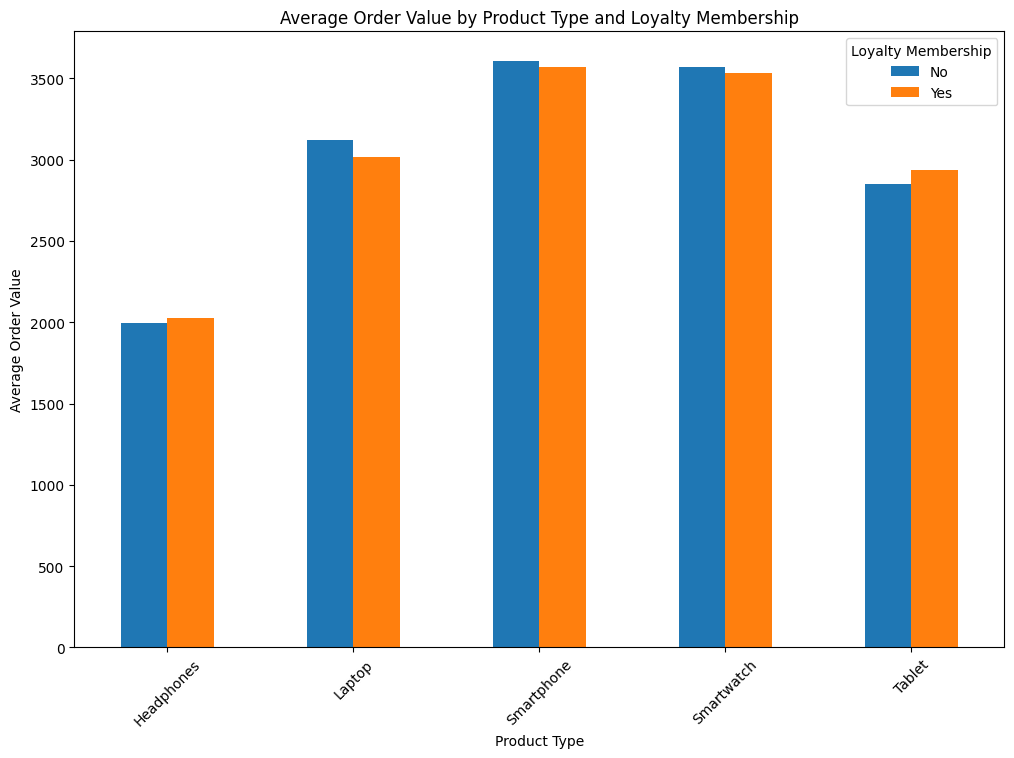

In [40]:
def visualize_aov(df):
    plt.figure(figsize=(12, 8))
    aov_by_product = df.groupby(['Product Type', 'Loyalty Member'])['Average Order Value'].mean().unstack()
    aov_by_product.plot(kind='bar', figsize=(12, 8))
    plt.title("Average Order Value by Product Type and Loyalty Membership")
    plt.xlabel("Product Type")
    plt.ylabel("Average Order Value")
    plt.legend(title="Loyalty Membership")
    plt.xticks(rotation=45)
    plt.show()

visualize_aov(aov_analysis)

 Revenue Contribution by Product Type

In [41]:
def calculate_revenue_contribution(df):
    total_revenue = df['Total Price'].sum()

    
    revenue_by_product = df.groupby('Product Type')['Total Price'].sum()
    revenue_percentage = (revenue_by_product / total_revenue) * 100

    return revenue_percentage

revenue_contribution = calculate_revenue_contribution(electronic_df)
print("\nRevenue Contribution by Product Type (%):\n", revenue_contribution)


Revenue Contribution by Product Type (%):
 Product Type
Headphones     6.354136
Laptop        19.332900
Smartphone    33.829956
Smartwatch    22.068686
Tablet        18.414322
Name: Total Price, dtype: float64


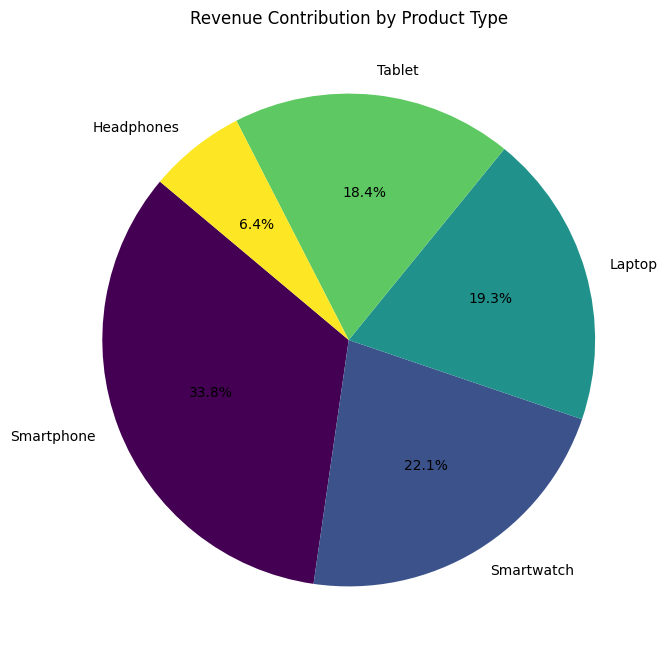

In [42]:
def visualize_revenue_contribution_pie(contribution):
    plt.figure(figsize=(10, 8))
    contribution.sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis', legend=False)
    plt.title("Revenue Contribution by Product Type")
    plt.ylabel("")  
    plt.show()
visualize_revenue_contribution_pie(revenue_contribution)


Transaction Analysis
Code: Evaluate Total Revenue and Identify High-Value Customers

Total Revenue: $63,602,668.37


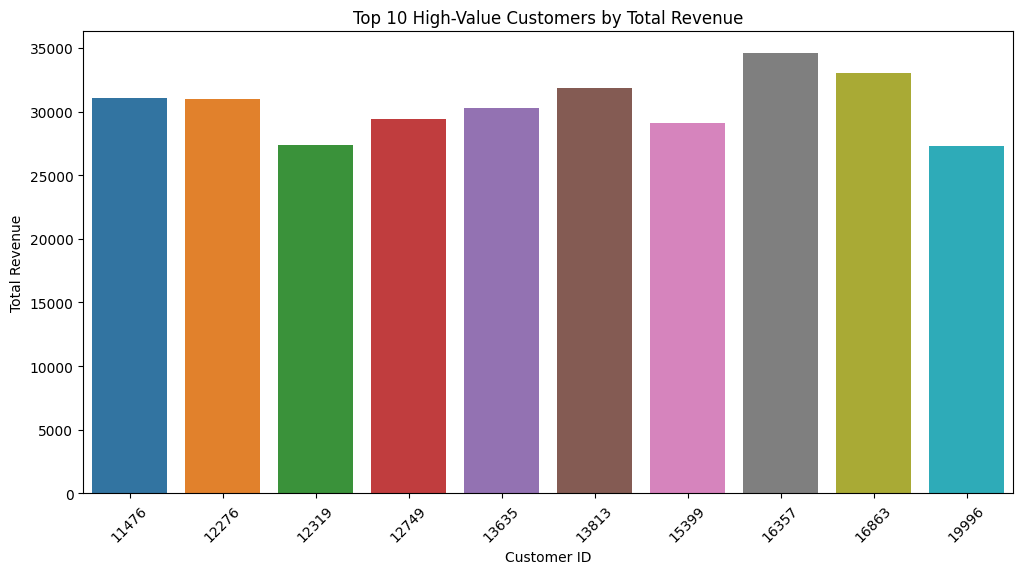

In [43]:
total_revenue = electronic_df['Total Price'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

customer_revenue = electronic_df.groupby('Customer ID')['Total Price'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='Total Price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Total Price', data=customer_revenue)
plt.title('Top 10 High-Value Customers by Total Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Code: Revenue Contributions by Product Type, Gender, and Loyalty Members

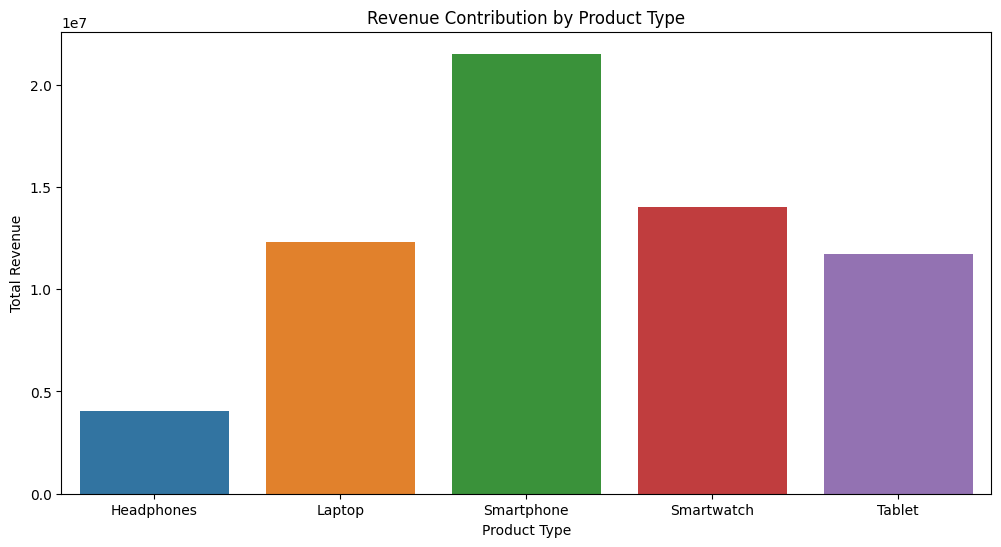

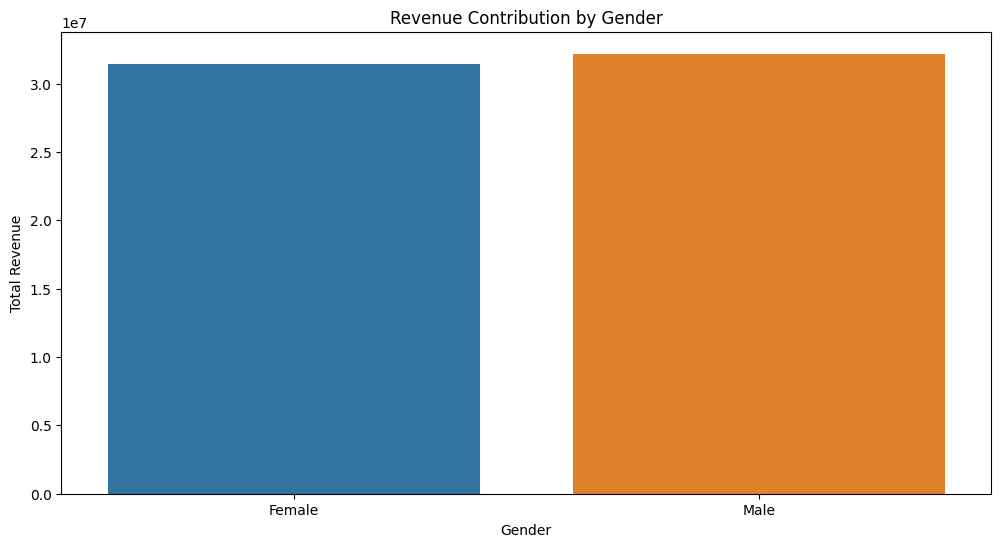

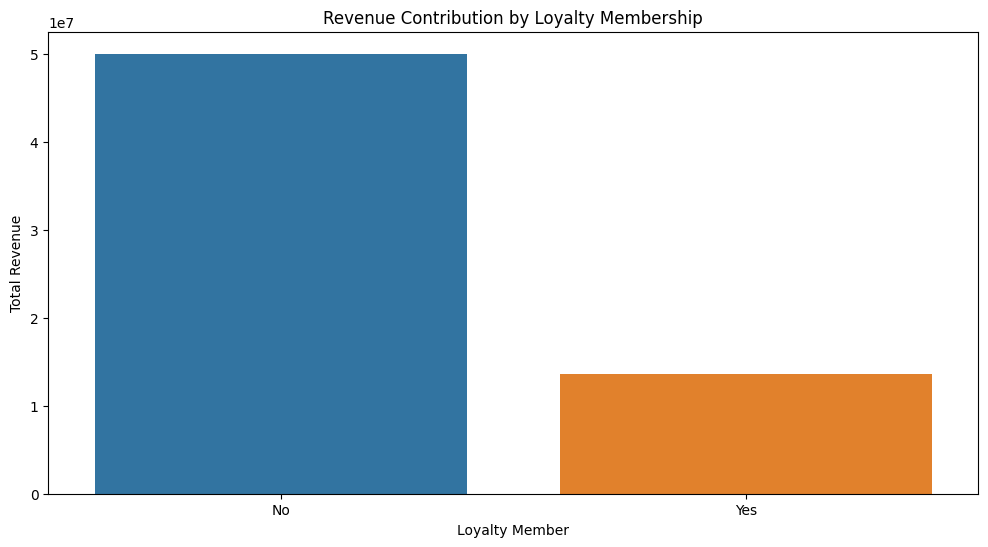

In [44]:
product_revenue = electronic_df.groupby('Product Type')['Total Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Total Price', data=product_revenue)
plt.title('Revenue Contribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.show()

gender_revenue = electronic_df.groupby('Gender')['Total Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Total Price', data=gender_revenue)
plt.title('Revenue Contribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.show()

loyalty_revenue = electronic_df.groupby('Loyalty Member')['Total Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Loyalty Member', y='Total Price', data=loyalty_revenue)
plt.title('Revenue Contribution by Loyalty Membership')
plt.xlabel('Loyalty Member')
plt.ylabel('Total Revenue')
plt.show()


2. Order Quantity Trends
Code: Bulk Purchases by Product and Customer

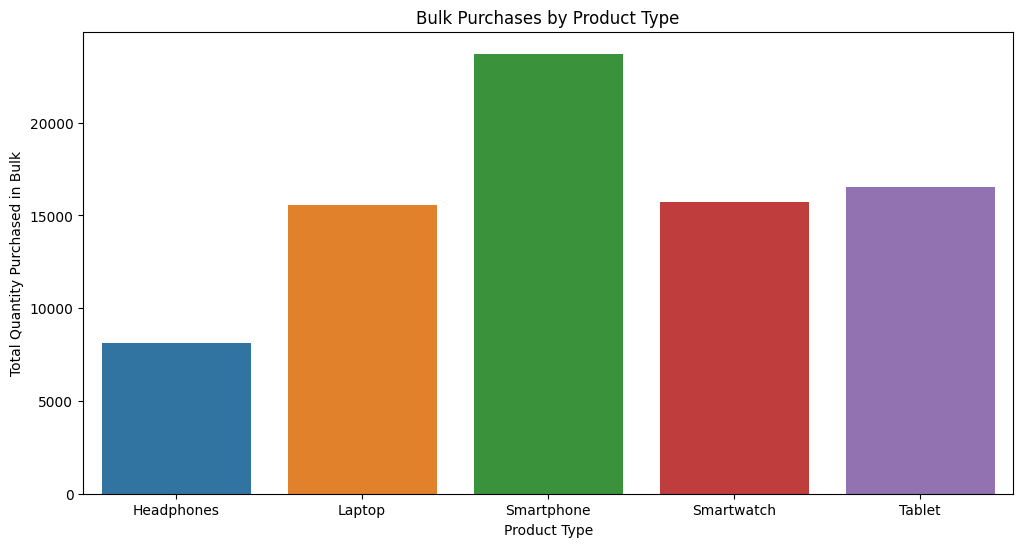

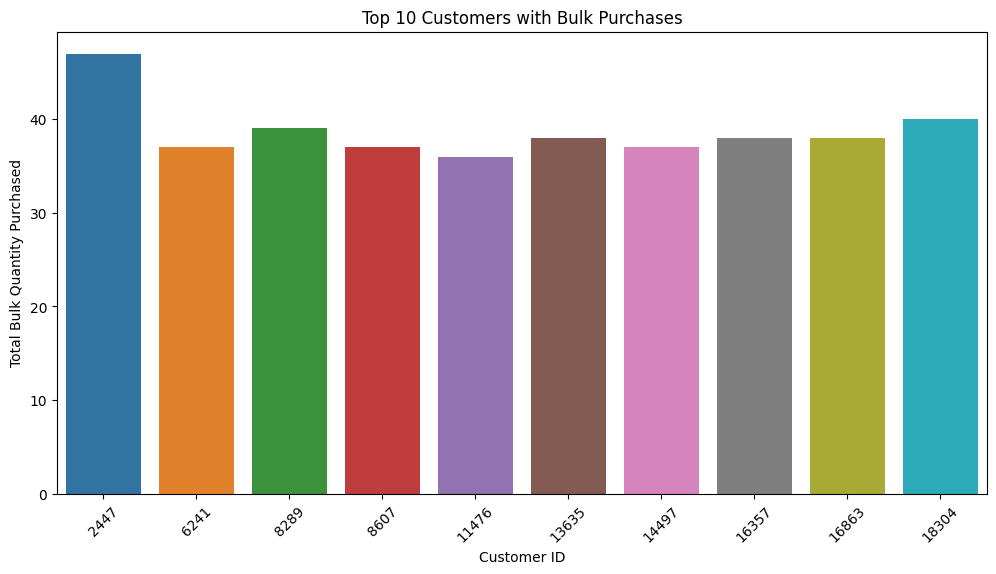

In [45]:
bulk_purchase_threshold = 5 
bulk_purchases = electronic_df[electronic_df['Quantity'] > bulk_purchase_threshold]

bulk_product_stats = bulk_purchases.groupby('Product Type')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Quantity', data=bulk_product_stats)
plt.title('Bulk Purchases by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Quantity Purchased in Bulk')
plt.show()

bulk_customer_stats = bulk_purchases.groupby('Customer ID')['Quantity'].sum().reset_index()
bulk_customer_stats = bulk_customer_stats.sort_values(by='Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Quantity', data=bulk_customer_stats)
plt.title('Top 10 Customers with Bulk Purchases')
plt.xlabel('Customer ID')
plt.ylabel('Total Bulk Quantity Purchased')
plt.xticks(rotation=45)
plt.show()


3. Seasonality
Code: Analyze Monthly and Seasonal Sales Trends

Seasonality Test: Sales Across Seasons

In [52]:

electronic_df = electronic_df.dropna(subset=['Purchase Date'])


electronic_df['Add-ons Purchased'] = electronic_df['Add-ons Purchased'].fillna('None')



electronic_df['Month'] = electronic_df['Purchase Date'].dt.month
seasons = {12: 'Winter', 1: 'Winter', 2: 'Winter',
           3: 'Spring', 4: 'Spring', 5: 'Spring',
           6: 'Summer', 7: 'Summer', 8: 'Summer',
           9: 'Fall', 10: 'Fall', 11: 'Fall'}
electronic_df['Season'] = electronic_df['Month'].map(seasons)


Average Sales by Season:
 Season
Fall      2922.287139
Spring    3276.345695
Summer    3314.998621
Winter    3071.473936
Name: Total Price, dtype: float64

ANOVA Test for Seasonality:
F-statistic: 22.960993167322364, P-value: 7.841397010572062e-15


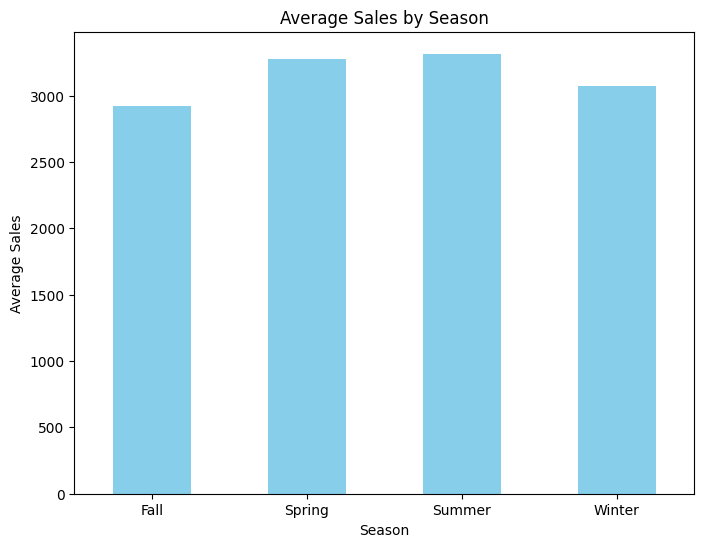

In [51]:
def seasonality_test(df):
    
    season_sales = df.groupby('Season')['Total Price'].mean()
    print("\nAverage Sales by Season:\n", season_sales)
    
    
    grouped_sales = [df[df['Season'] == season]['Total Price'] for season in df['Season'].unique()]
    f_stat, p_val = f_oneway(*grouped_sales)
    print(f"\nANOVA Test for Seasonality:\nF-statistic: {f_stat}, P-value: {p_val}")


    season_sales.plot(kind='bar', color='skyblue', figsize=(8, 6))
    plt.title("Average Sales by Season")
    plt.xlabel("Season")
    plt.ylabel("Average Sales")
    plt.xticks(rotation=0)
    plt.show()

seasonality_test(electronic_df)


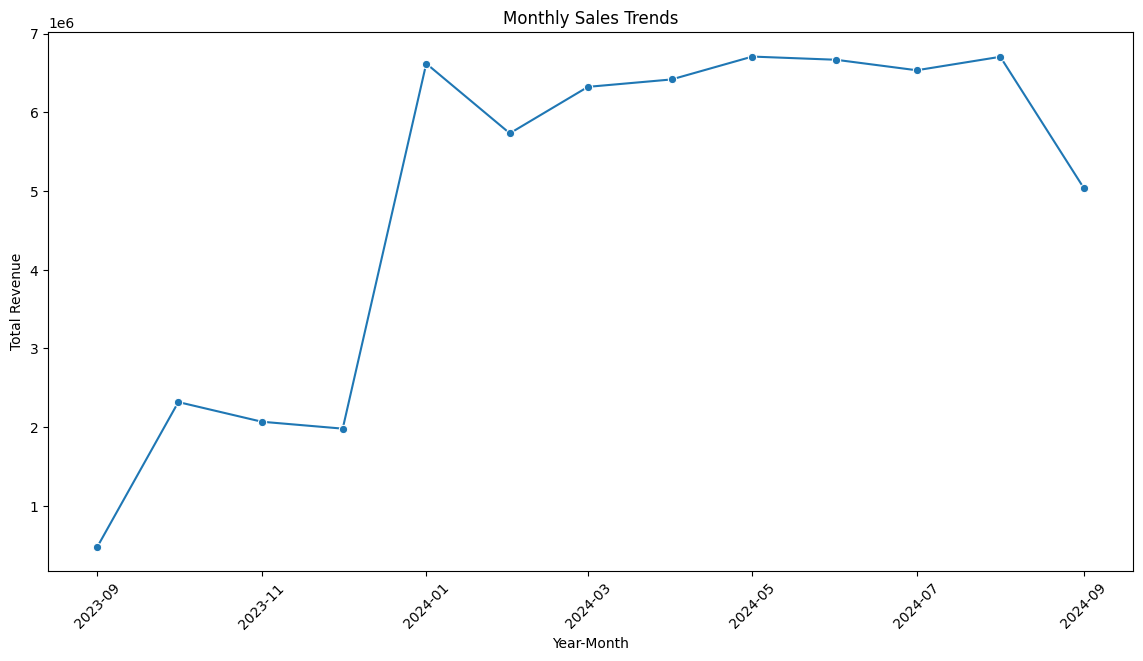

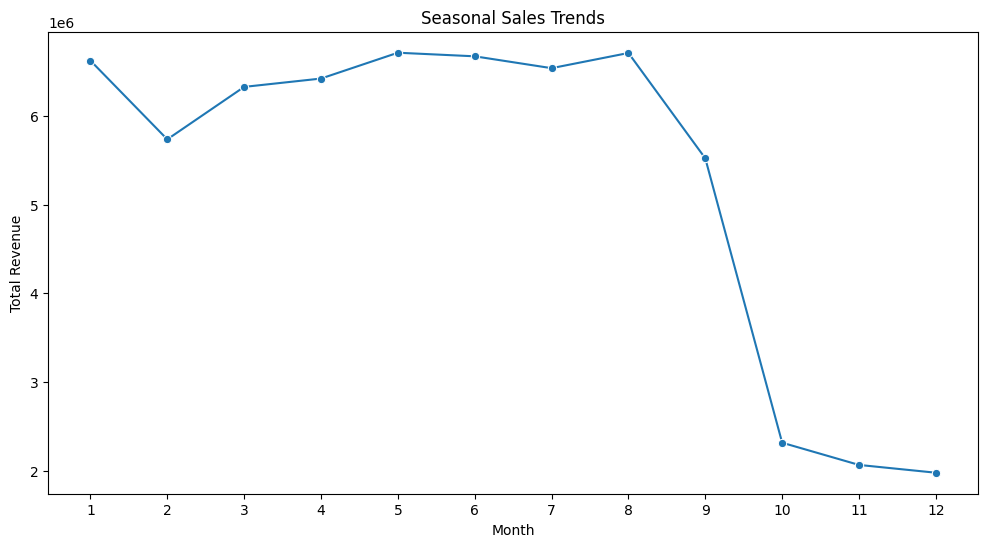

In [50]:
electronic_df['Year-Month'] = electronic_df['Purchase Date'].dt.to_period('M')

monthly_sales = electronic_df.groupby('Year-Month')['Total Price'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Year-Month', y='Total Price', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

electronic_df['Month'] = electronic_df['Purchase Date'].dt.month
seasonal_sales = electronic_df.groupby('Month')['Total Price'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total Price', data=seasonal_sales, marker='o')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.show()


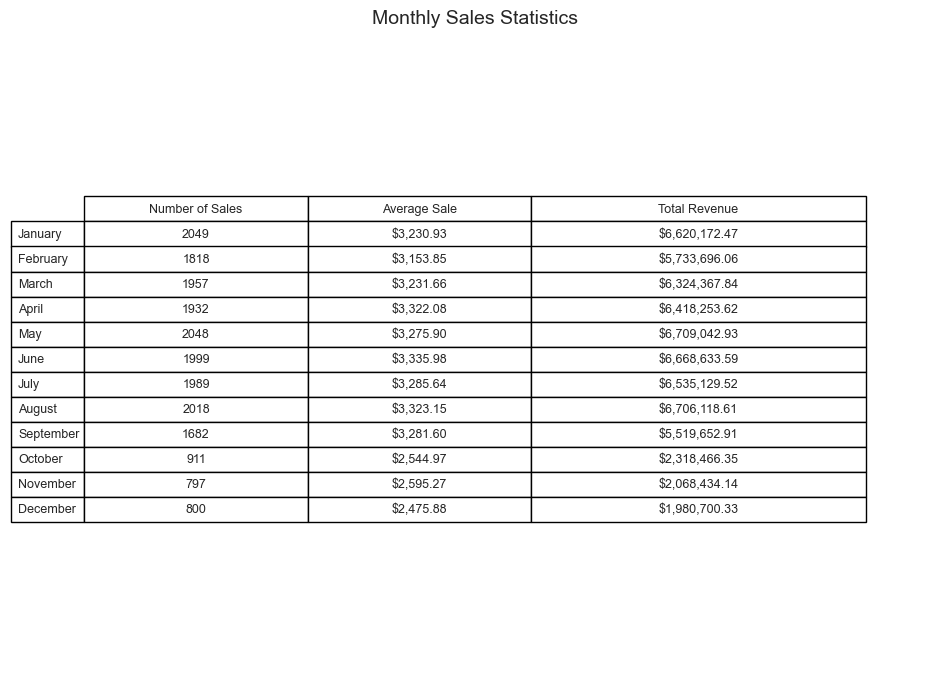


Key Statistics:
Highest revenue month: May ($6,709,042.93)
Most transactions: January (2,049 sales)
Highest average sale: June ($3,335.98)


In [66]:
electronic_df['Month_Name'] = pd.to_datetime(electronic_df['Purchase Date']).dt.strftime('%B')

monthly_stats = electronic_df.groupby('Month_Name').agg({
    'Total Price': ['count', 'mean', 'sum']
}).round(2)

raw_stats = {
    'count': monthly_stats['Total Price']['count'],
    'mean': monthly_stats['Total Price']['mean'],
    'sum': monthly_stats['Total Price']['sum']
}

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_stats = monthly_stats.reindex(month_order)

formatted_stats = pd.DataFrame({
    'Number of Sales': monthly_stats['Total Price']['count'],
    'Average Sale': monthly_stats['Total Price']['mean'].apply(lambda x: f"${x:,.2f}"),
    'Total Revenue': monthly_stats['Total Price']['sum'].apply(lambda x: f"${x:,.2f}")
})

plt.figure(figsize=(12, 8))
plt.axis('off')
table = plt.table(cellText=formatted_stats.values,
                 colLabels=formatted_stats.columns,
                 rowLabels=formatted_stats.index,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.2, 0.2, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
plt.title("Monthly Sales Statistics", pad=20, fontsize=14)
plt.show()

print("\nKey Statistics:")
highest_revenue_month = raw_stats['sum'].idxmax()
highest_sales_month = raw_stats['count'].idxmax()
highest_average_month = raw_stats['mean'].idxmax()

print(f"Highest revenue month: {highest_revenue_month} (${raw_stats['sum'].max():,.2f})")
print(f"Most transactions: {highest_sales_month} ({raw_stats['count'].max():,.0f} sales)")
print(f"Highest average sale: {highest_average_month} (${raw_stats['mean'].max():,.2f})")

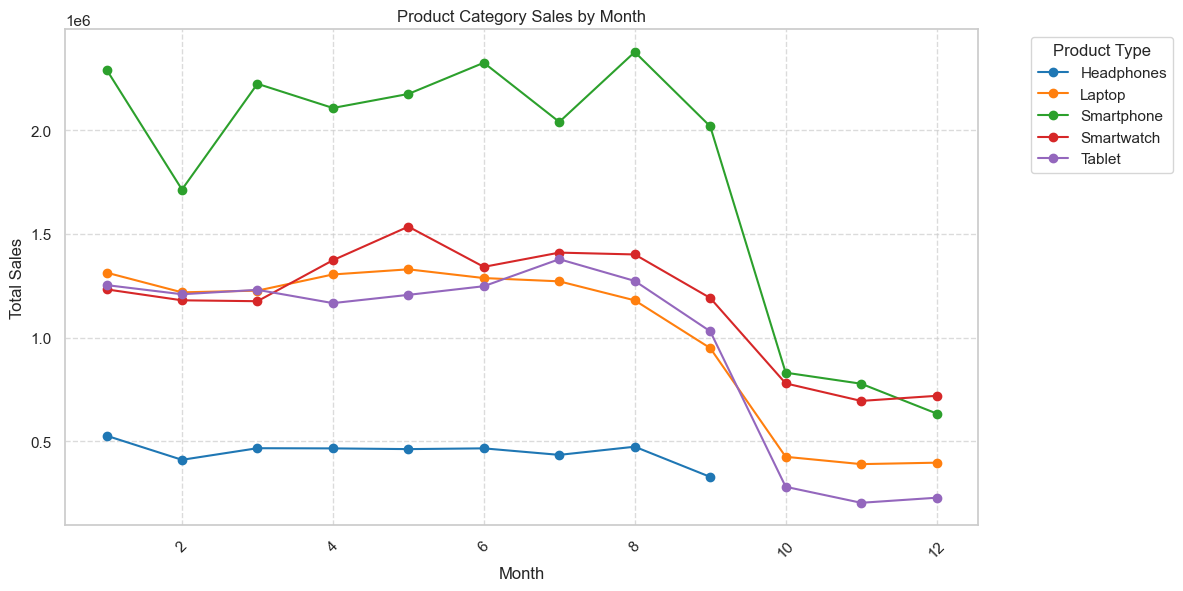

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

product_sales_by_month = electronic_df.groupby(['Month', 'Product Type'])['Total Price'].sum().unstack()

plt.figure(figsize=(12, 6))
for product in product_sales_by_month.columns:
    plt.plot(product_sales_by_month.index, product_sales_by_month[product], label=product, marker='o')

plt.title("Product Category Sales by Month")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

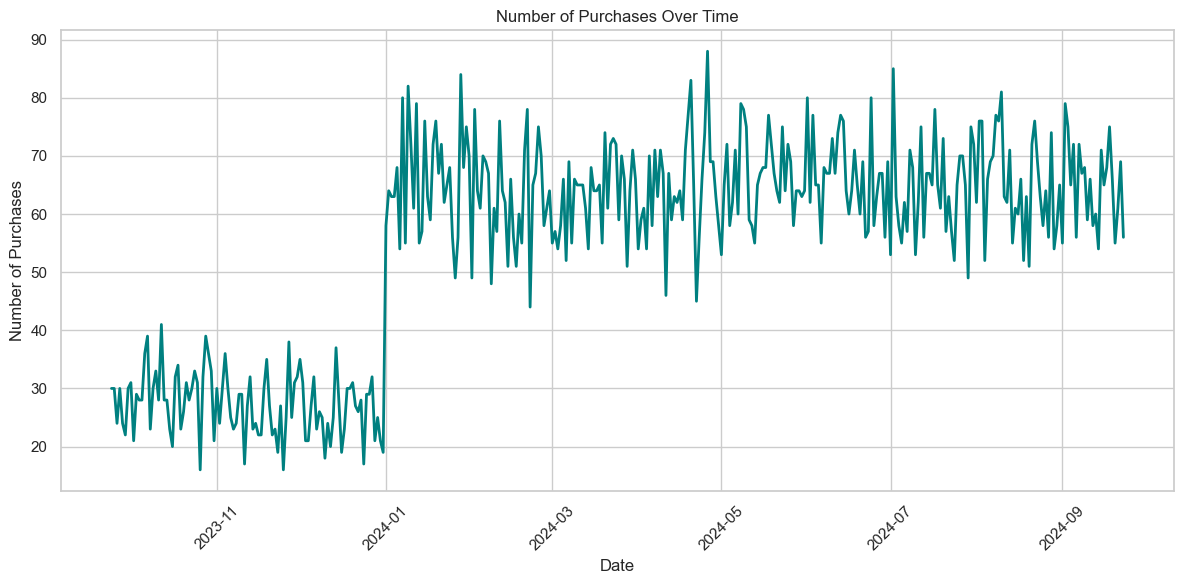

In [95]:
purchase_counts = electronic_df.groupby(electronic_df['Purchase Date'].dt.date).size()

plt.figure(figsize=(12, 6))
purchase_counts.plot(kind='line', color='teal', linewidth=2)
plt.title('Number of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


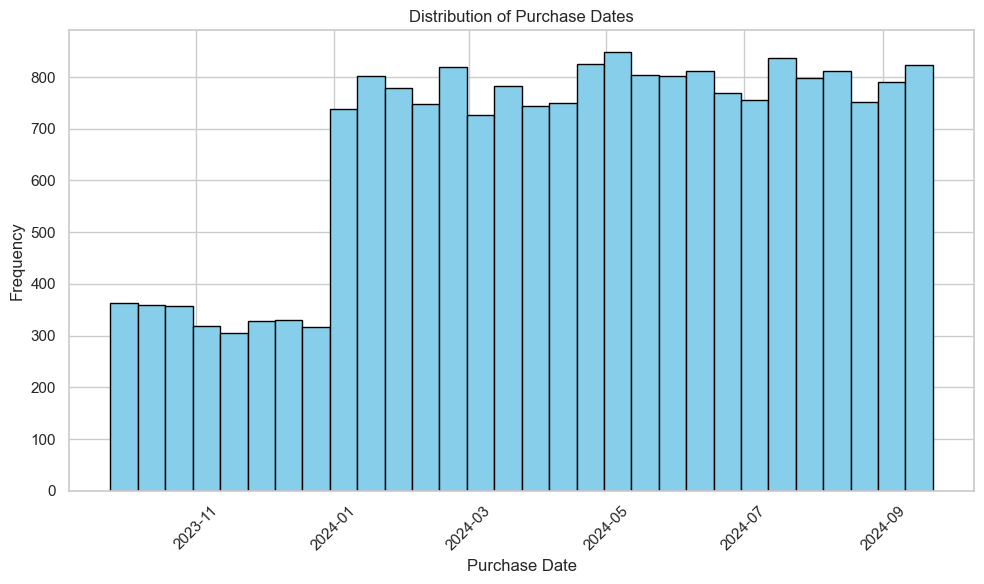

In [96]:
plt.figure(figsize=(10, 6))
plt.hist(electronic_df['Purchase Date'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Dates')
plt.xlabel('Purchase Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--------------------------- NEW ANALYSIS BLOCK ( 5 )---------------------------------------------------------------------

5. Order Completion and Cancellation

Code: Identify Trends in Order Cancellations

Order Status Analysis (Percentage):
 Completed    67.16
Cancelled    32.84
Name: Order Status, dtype: float64


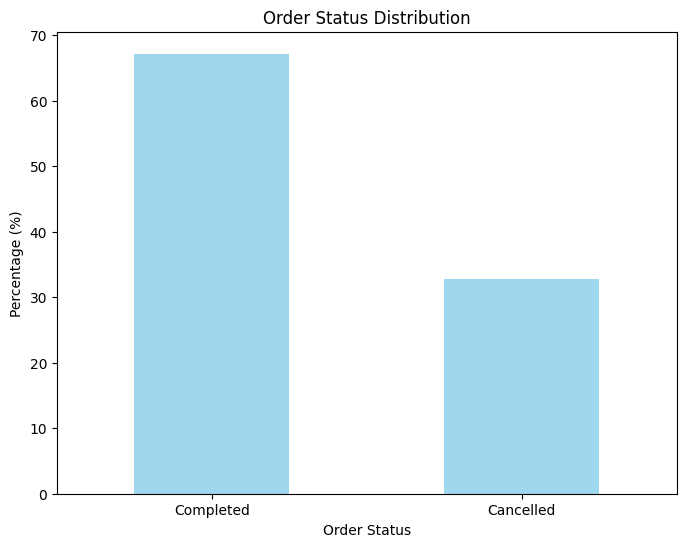

In [38]:
def order_status_analysis(df):
    
    order_status_counts = df['Order Status'].value_counts(normalize=True) * 100
    print("Order Status Analysis (Percentage):\n", order_status_counts)


    plt.figure(figsize=(8, 6))
    order_status_counts.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title("Order Status Distribution")
    plt.xlabel("Order Status")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=0)
    plt.show()

order_status_analysis(electronic_df)

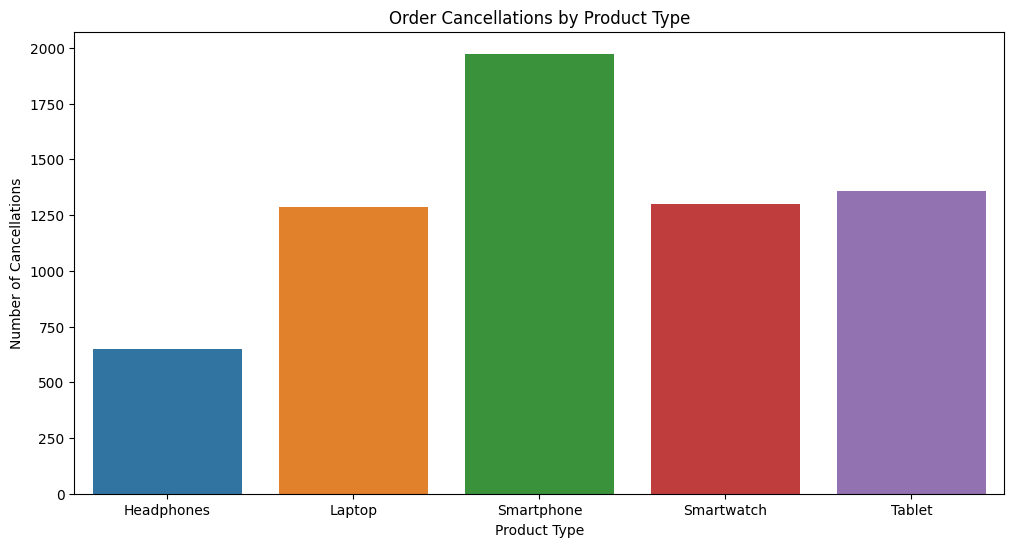

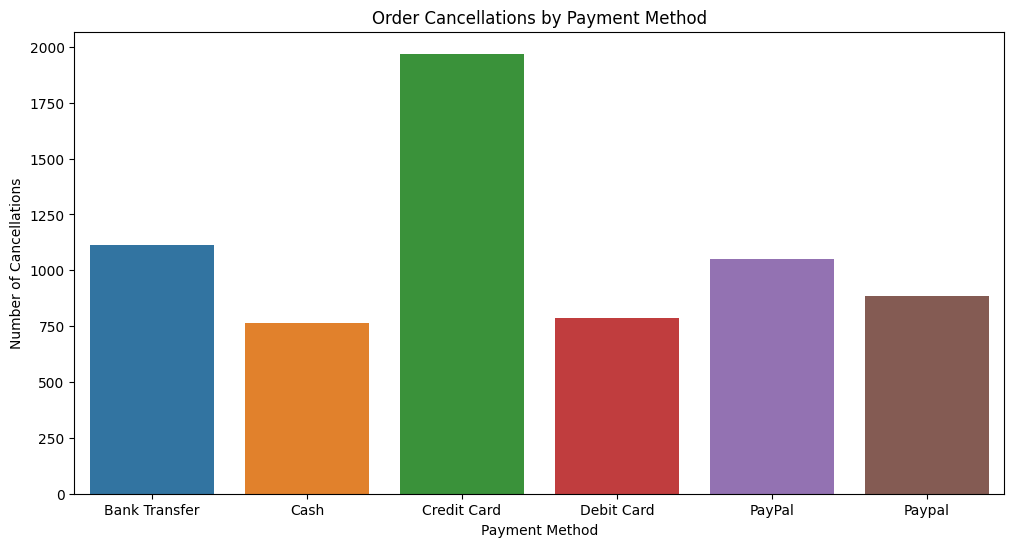

In [39]:
order_status_product = electronic_df.groupby(['Product Type', 'Order Status']).size().reset_index(name='Order Count')

cancellation_data = order_status_product[order_status_product['Order Status'] == 'Cancelled']
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Order Count', data=cancellation_data)
plt.title('Order Cancellations by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Cancellations')
plt.show()

order_status_payment = electronic_df.groupby(['Payment Method', 'Order Status']).size().reset_index(name='Order Count')

cancellation_payment_data = order_status_payment[order_status_payment['Order Status'] == 'Cancelled']
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Order Count', data=cancellation_payment_data)
plt.title('Order Cancellations by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Cancellations')
plt.show()


2. Compare Spending Patterns Between Completed and Canceled Orders
Code: Analyze Spending Patterns

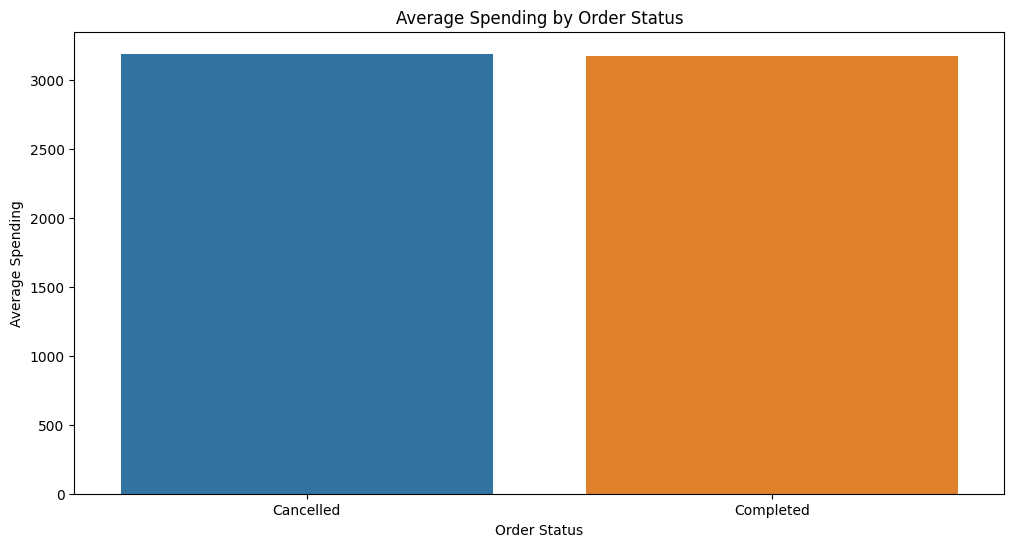

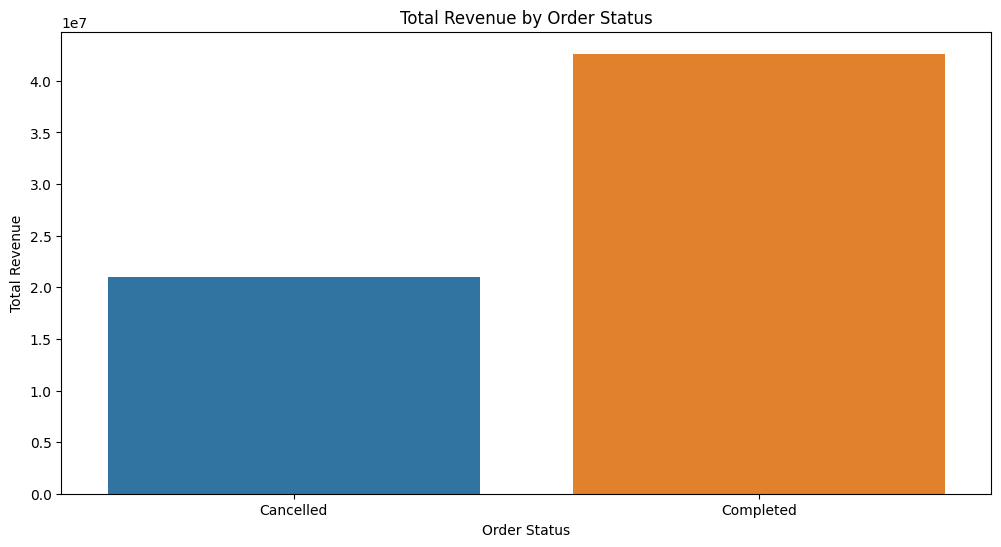

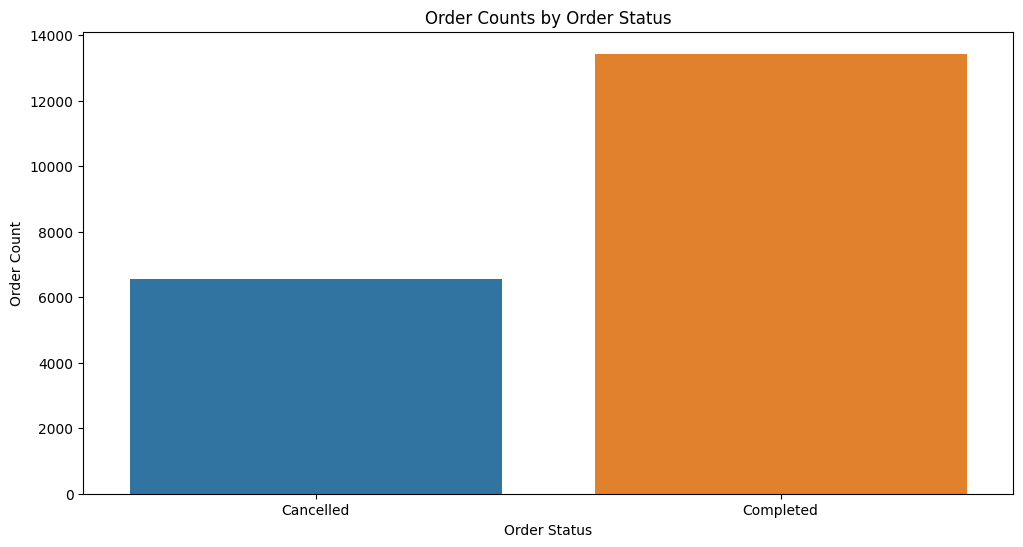

In [40]:
spending_patterns = electronic_df.groupby('Order Status')['Total Price'].agg(['mean', 'sum', 'count']).reset_index()
spending_patterns.columns = ['Order Status', 'Average Spending', 'Total Revenue', 'Order Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Order Status', y='Average Spending', data=spending_patterns)
plt.title('Average Spending by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Spending')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Order Status', y='Total Revenue', data=spending_patterns)
plt.title('Total Revenue by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Revenue')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Order Status', y='Order Count', data=spending_patterns)
plt.title('Order Counts by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Order Count')
plt.show()


3. Detailed Cancellations Analysis
Code: Examine Product Types with High Cancellation Rates

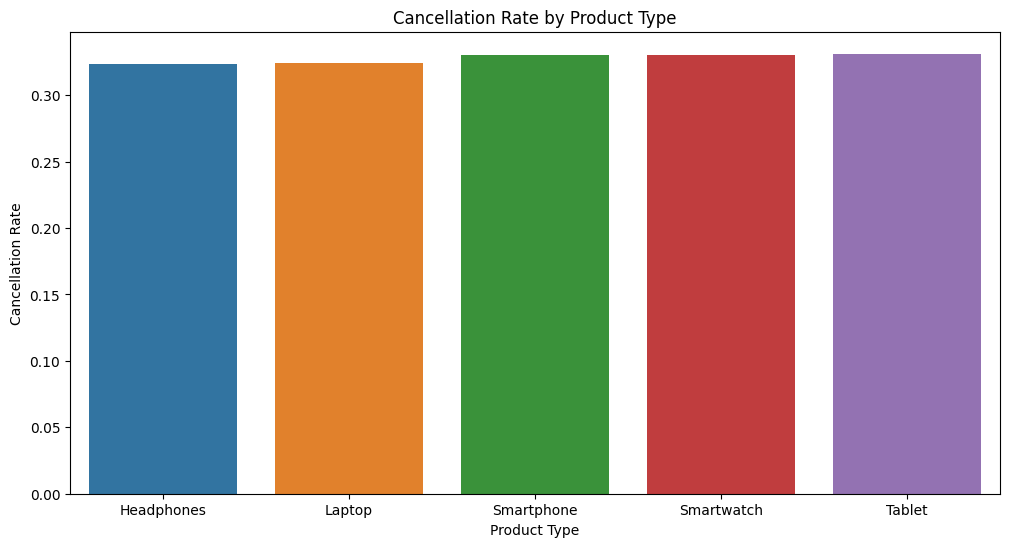

In [41]:
product_cancellation_rate = (
    electronic_df[electronic_df['Order Status'] == 'Cancelled']
    .groupby('Product Type')['Order Status']
    .count() / electronic_df.groupby('Product Type')['Order Status'].count()
).reset_index(name='Cancellation Rate')

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Cancellation Rate', data=product_cancellation_rate)
plt.title('Cancellation Rate by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Cancellation Rate')
plt.show()


--------------------------- NEW ANALYSIS BLOCK ( 6 )---------------------------------------------------------------------

6. Payment Methods and Shipping Preferences
Payment Preferences:

Payment Preferences
Code: Analyze Popularity of Payment Methods


Payment Method Preferences Analysis:
                 Average Spending  Completion Rate (%)
Payment Method                                       
bank transfer        3766.912516            67.012756
cash                 2510.261569            69.301766
credit card          3223.206019            66.445126
debit card           2726.109891            68.150546
paypal               3276.792685            66.626423


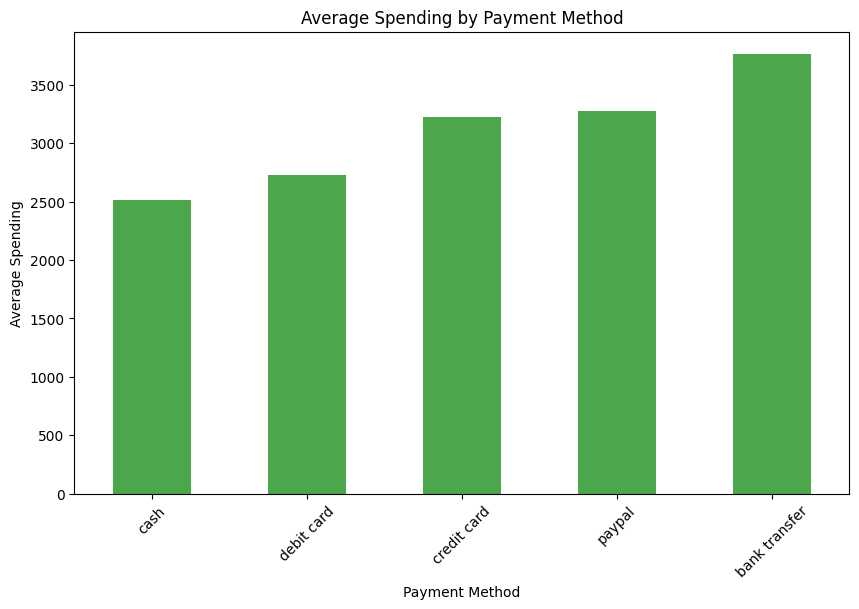

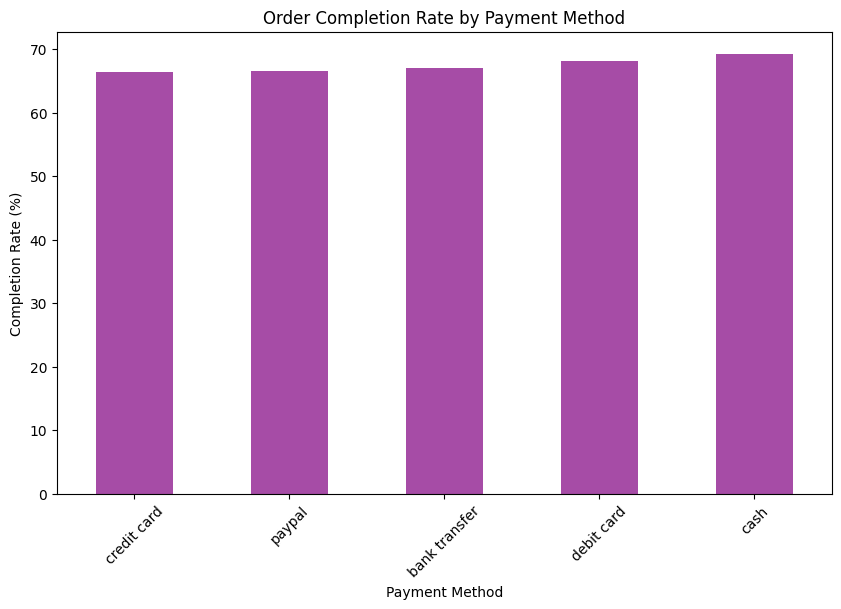

In [13]:
def payment_method_analysis(df):
    df['Payment Method'] = df['Payment Method'].str.strip().str.lower()
    
    payment_analysis = df.groupby('Payment Method').agg({
        'Total Price': 'mean',
        'Order Status': lambda x: (x == 'Completed').mean() * 100  
    }).rename(columns={'Total Price': 'Average Spending', 'Order Status': 'Completion Rate (%)'})
    
    print("\nPayment Method Preferences Analysis:\n", payment_analysis)

    plt.figure(figsize=(10, 6))
    payment_analysis['Average Spending'].sort_values().plot(kind='bar', color='green', alpha=0.7)
    plt.title("Average Spending by Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Average Spending")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    payment_analysis['Completion Rate (%)'].sort_values().plot(kind='bar', color='purple', alpha=0.7)
    plt.title("Order Completion Rate by Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Completion Rate (%)")
    plt.xticks(rotation=45)
    plt.show()

payment_method_analysis(electronic_df)



Payment Method Preferences Analysis:
                 Average Spending  Completion Rate (%)
Payment Method                                       
Bank Transfer        3766.912516            67.012756
Cash                 2510.261569            69.301766
Credit Card          3223.206019            66.445126
Debit Card           2726.109891            68.150546
PayPal               3806.352896            68.057247
Paypal               2585.036229            64.757359


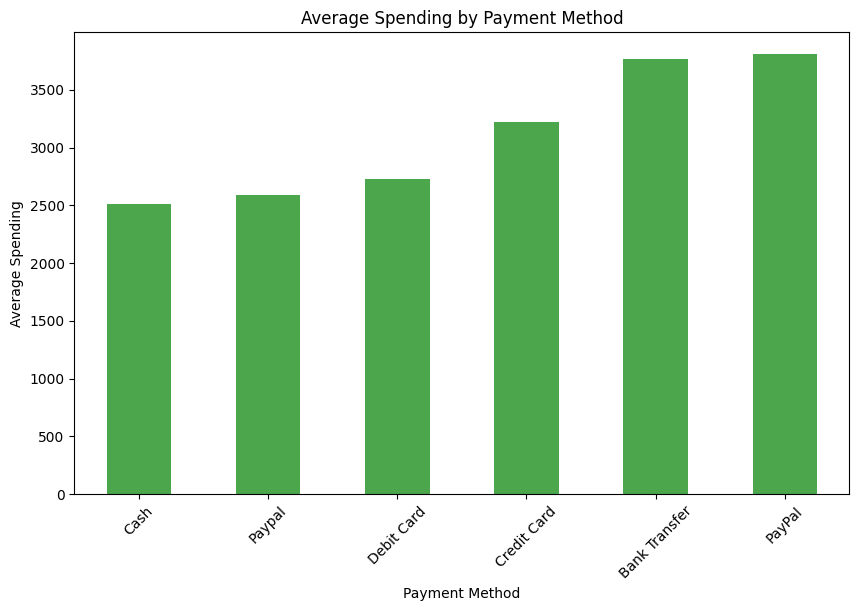

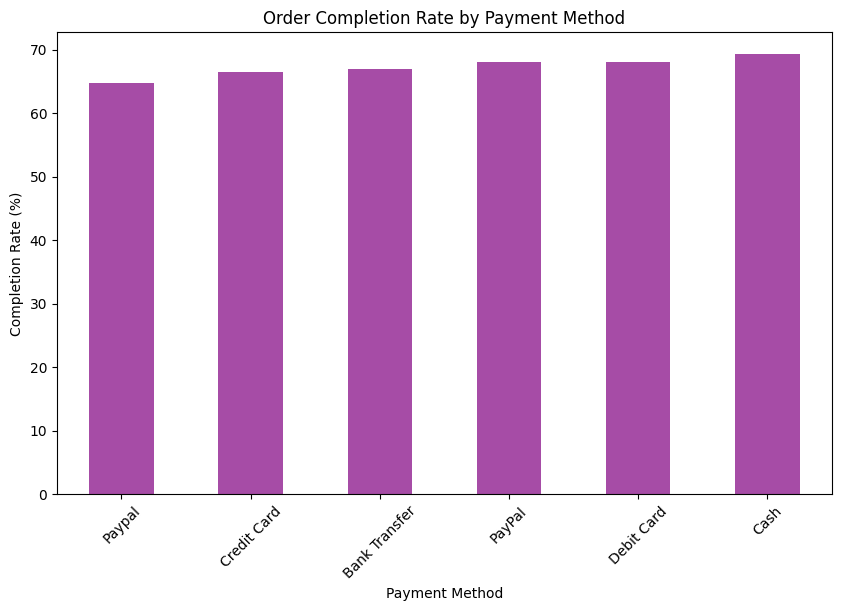

In [9]:
def payment_method_analysis(df):

    payment_analysis = df.groupby('Payment Method').agg({
        'Total Price': 'mean',
        'Order Status': lambda x: (x == 'Completed').mean() * 100  
    }).rename(columns={'Total Price': 'Average Spending', 'Order Status': 'Completion Rate (%)'})
    print("\nPayment Method Preferences Analysis:\n", payment_analysis)


    plt.figure(figsize=(10, 6))
    payment_analysis['Average Spending'].sort_values().plot(kind='bar', color='green', alpha=0.7)
    plt.title("Average Spending by Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Average Spending")
    plt.xticks(rotation=45)
    plt.show()


    plt.figure(figsize=(10, 6))
    payment_analysis['Completion Rate (%)'].sort_values().plot(kind='bar', color='purple', alpha=0.7)
    plt.title("Order Completion Rate by Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Completion Rate (%)")
    plt.xticks(rotation=45)
    plt.show()

payment_method_analysis(electronic_df)

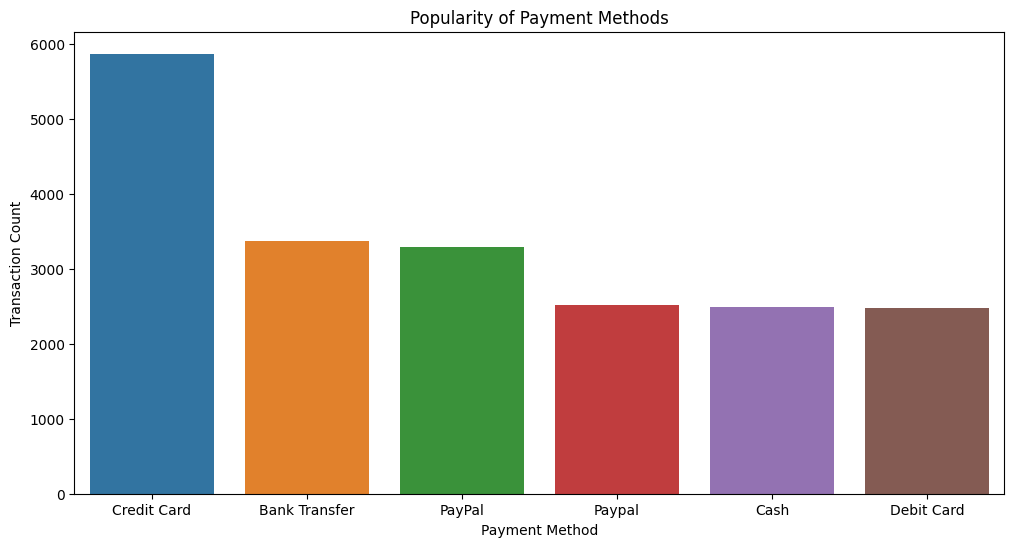

In [44]:
payment_method_stats = electronic_df['Payment Method'].value_counts().reset_index()
payment_method_stats.columns = ['Payment Method', 'Transaction Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Transaction Count', data=payment_method_stats)
plt.title('Popularity of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Transaction Count')
plt.show()


Code: Correlate Payment Methods with Transaction Size and Order Status

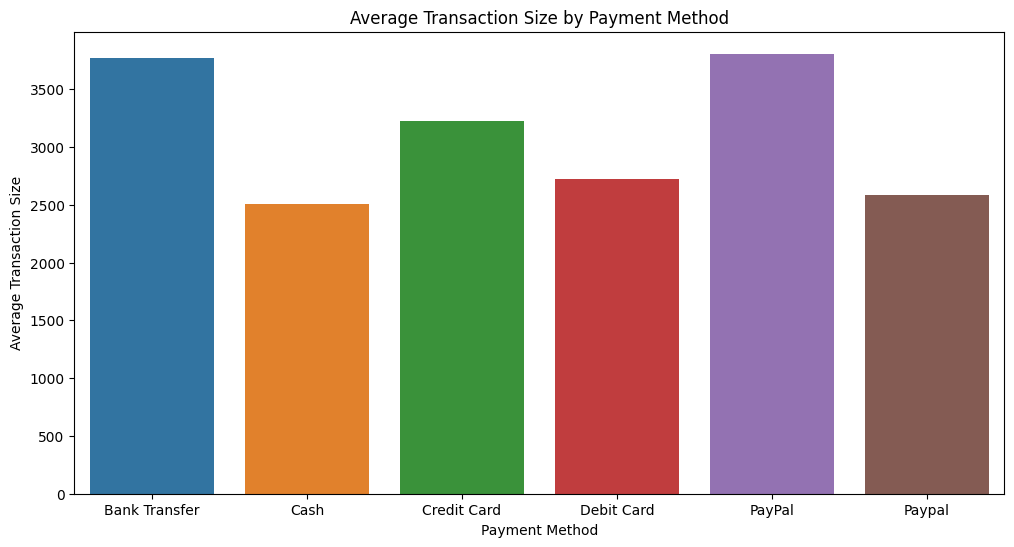

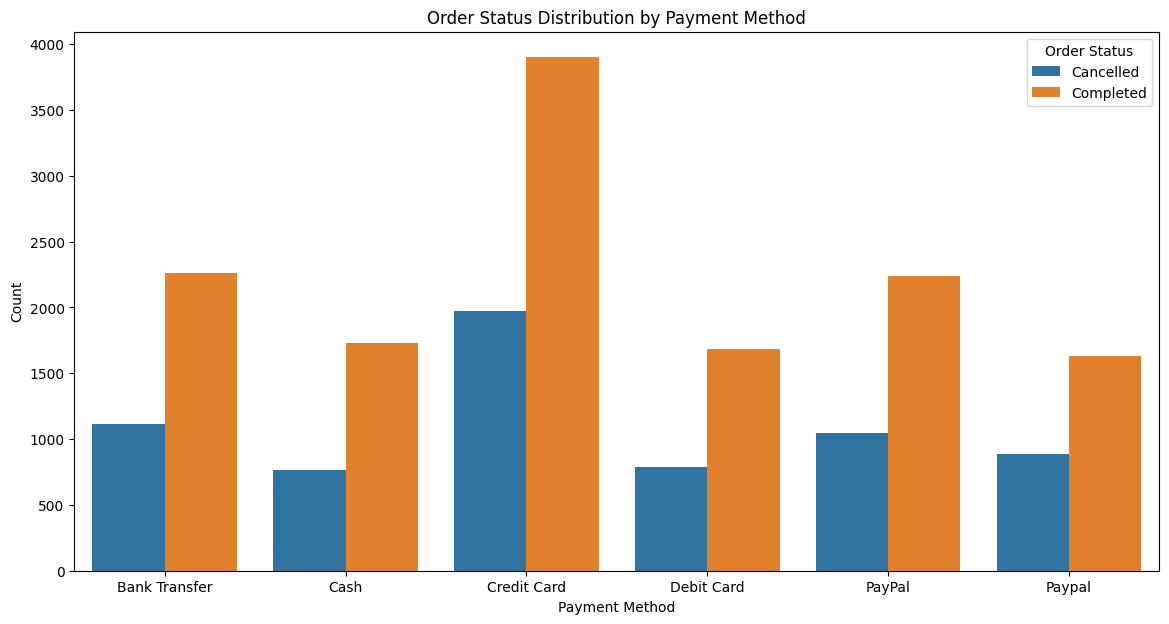

In [45]:
payment_size_stats = electronic_df.groupby('Payment Method')['Total Price'].mean().reset_index()
payment_size_stats.columns = ['Payment Method', 'Average Transaction Size']

plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Average Transaction Size', data=payment_size_stats)
plt.title('Average Transaction Size by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Transaction Size')
plt.show()

payment_order_status = electronic_df.groupby(['Payment Method', 'Order Status']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Payment Method', y='Count', hue='Order Status', data=payment_order_status)
plt.title('Order Status Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Order Status')
plt.show()


2. Shipping Preferences
Code: Analyze Popularity of Shipping Types

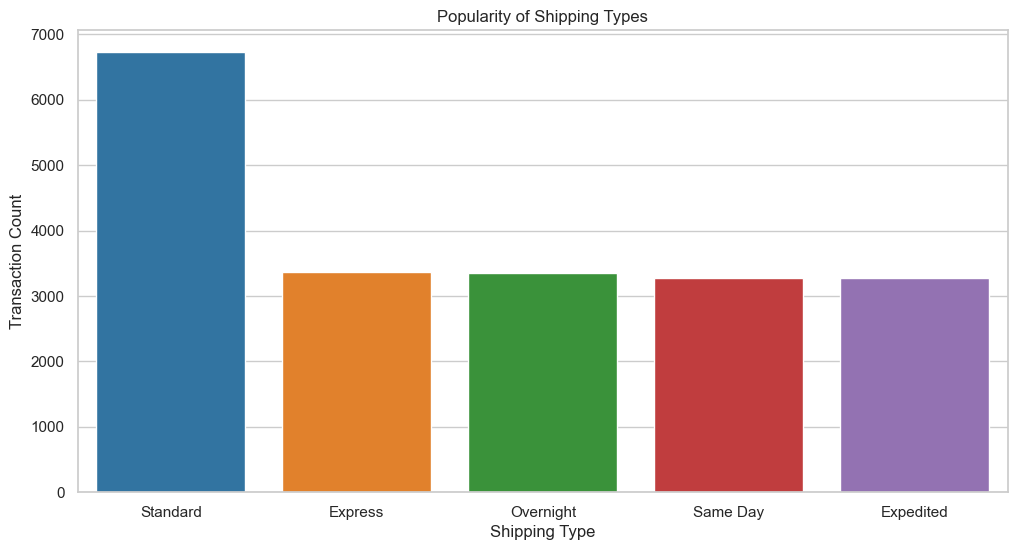

In [97]:
shipping_type_stats = electronic_df['Shipping Type'].value_counts().reset_index()
shipping_type_stats.columns = ['Shipping Type', 'Transaction Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Type', y='Transaction Count', data=shipping_type_stats)
plt.title('Popularity of Shipping Types')
plt.xlabel('Shipping Type')
plt.ylabel('Transaction Count')
plt.show()


Code: Determine Impact of Shipping Type on Total Spending

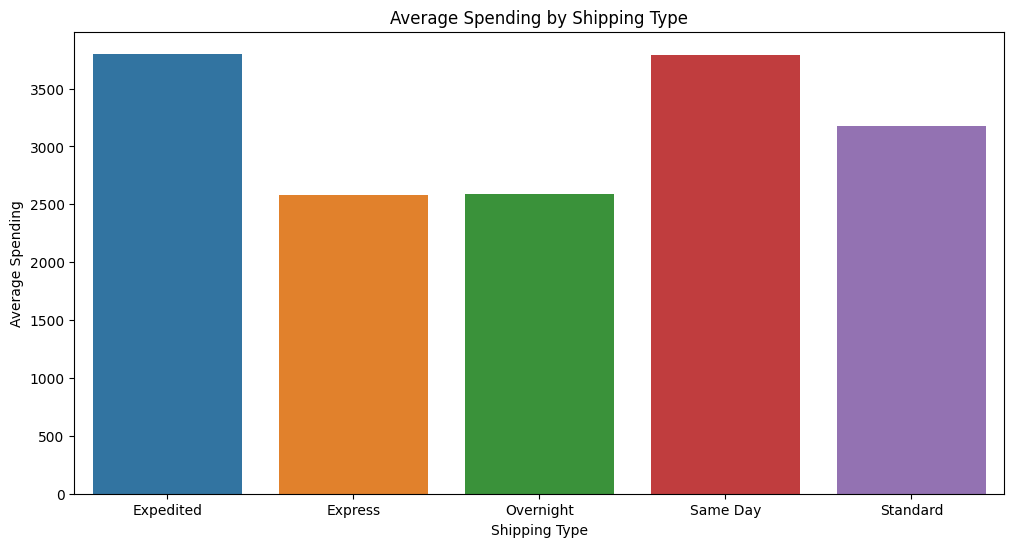

In [47]:
shipping_spending_stats = electronic_df.groupby('Shipping Type')['Total Price'].mean().reset_index()
shipping_spending_stats.columns = ['Shipping Type', 'Average Spending']

plt.figure(figsize=(12, 6))
sns.barplot(x='Shipping Type', y='Average Spending', data=shipping_spending_stats)
plt.title('Average Spending by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Spending')
plt.show()


Code: Analyze Order Status Across Shipping Types

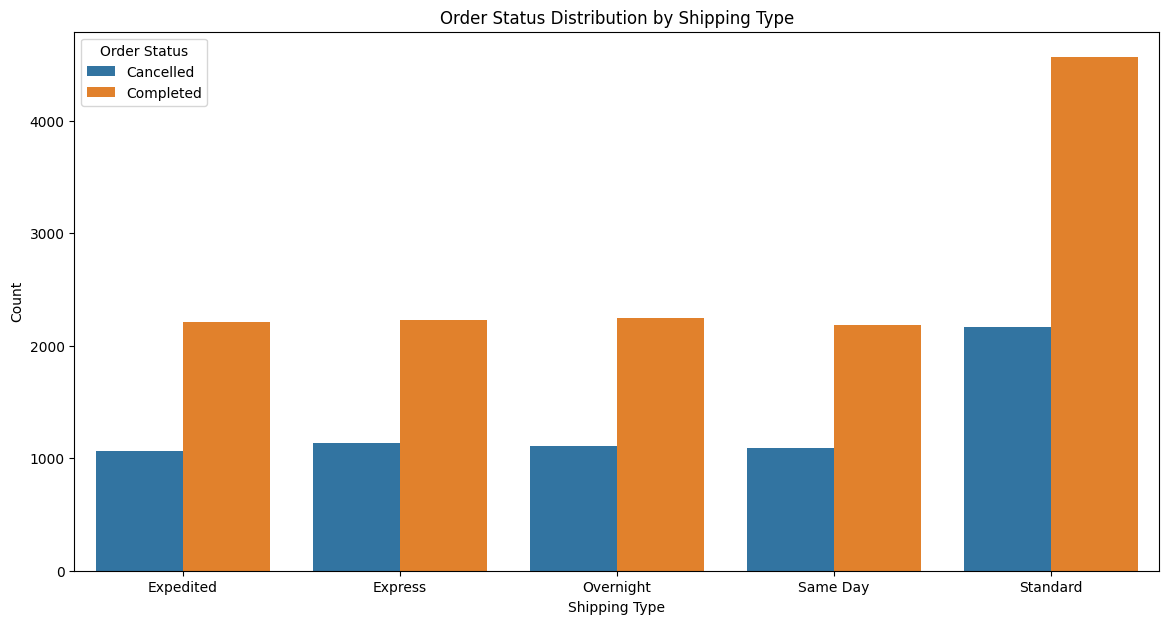

In [48]:
shipping_order_status = electronic_df.groupby(['Shipping Type', 'Order Status']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Shipping Type', y='Count', hue='Order Status', data=shipping_order_status)
plt.title('Order Status Distribution by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.legend(title='Order Status')
plt.show()



Average Total Spending by Shipping Type:
 Shipping Type
Expedited    3801.199942
Express      2580.277962
Overnight    2593.037882
Same Day     3790.251470
Standard     3173.691234
Name: Total Price, dtype: float64

T-Test for Shipping Type:
T-statistic: 11.659413380618405, P-value: 3.9106957225648128e-31


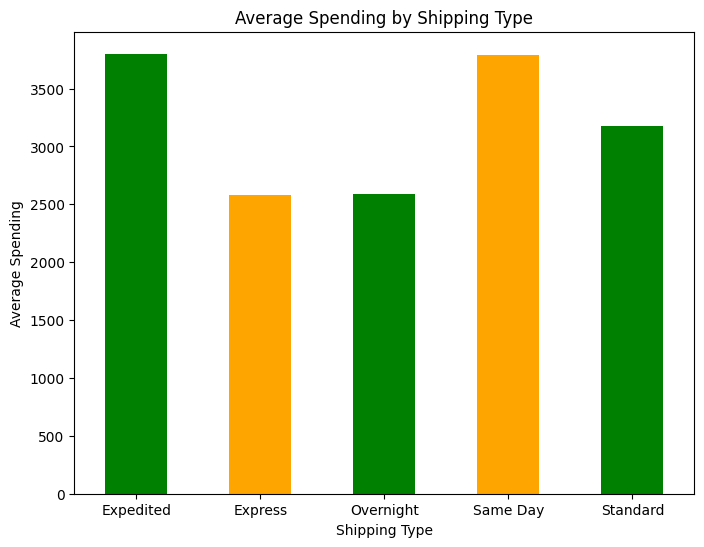

In [49]:
def shipping_type_test(df):
    
    shipping_sales = df.groupby('Shipping Type')['Total Price'].mean()
    print("\nAverage Total Spending by Shipping Type:\n", shipping_sales)
    
    
    standard = df[df['Shipping Type'] == 'Standard']['Total Price']
    express = df[df['Shipping Type'] == 'Express']['Total Price']
    t_stat, p_val = ttest_ind(standard, express, equal_var=False)  
    print(f"\nT-Test for Shipping Type:\nT-statistic: {t_stat}, P-value: {p_val}")

    # Visualization
    shipping_sales.plot(kind='bar', color=['green', 'orange'], figsize=(8, 6))
    plt.title("Average Spending by Shipping Type")
    plt.xlabel("Shipping Type")
    plt.ylabel("Average Spending")
    plt.xticks(rotation=0)
    plt.show()

shipping_type_test(electronic_df)

------------------ NEW ANALYSIS BLOCK (7)------------------------------

7. Add-ons and Cross-Selling

1. Add-on Purchases
Code: Assess Frequency of Add-ons and Identify Common Types

Add on Purchase Analysis


Top Add-ons by Product Type:
Add-ons Purchased   Accessory   Extended Warranty   Impulse Item  Accessory  \
Product Type                                                                  
Headphones                497                 524            534        519   
Laptop                    514                 463            538       1457   
Smartphone                482                 546            513       2559   
Smartwatch                482                 489            462       1461   
Tablet                    512                 513            501       1565   

Add-ons Purchased  Extended Warranty  Impulse Item  None  
Product Type                                              
Headphones                       476           534   483  
Laptop                          1535          1539   970  
Smartphone                      2449          2461  1486  
Smartwatch                      1462          1551   942  
Tablet                          1518          1601   987  


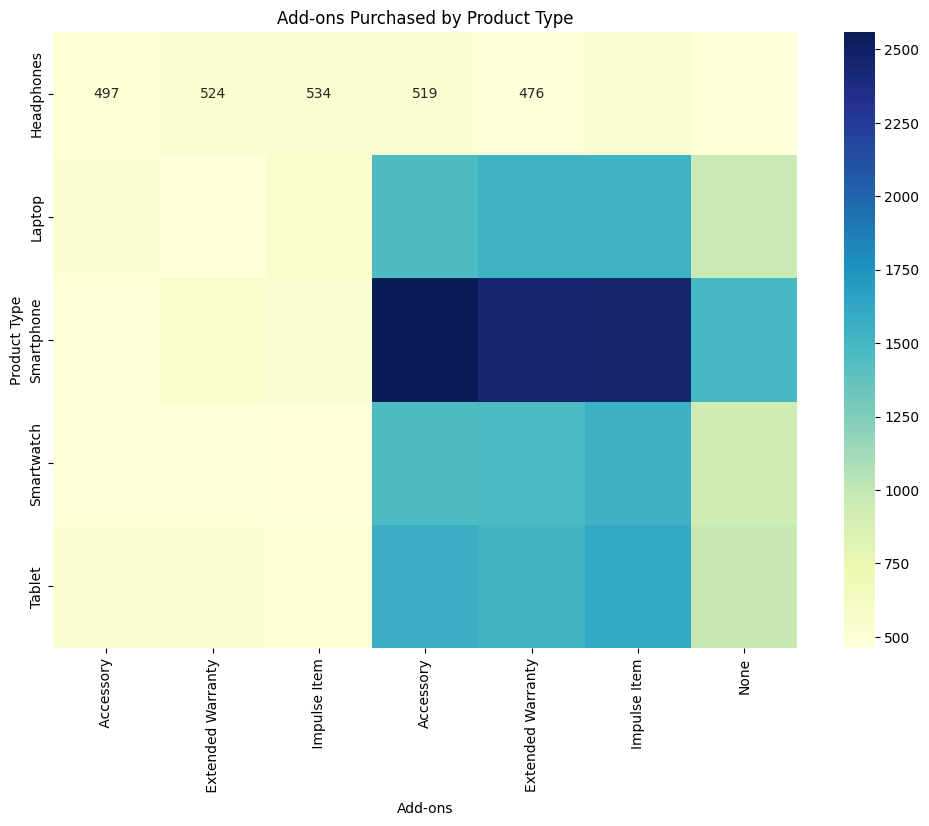

In [50]:
def add_on_purchases_analysis(df):
    
    add_ons = df[['Product Type', 'Add-ons Purchased']].copy()
    add_ons['Add-ons Purchased'] = add_ons['Add-ons Purchased'].str.split(',')
    add_on_expanded = add_ons.explode('Add-ons Purchased')

    
    add_on_counts = add_on_expanded.groupby(['Product Type', 'Add-ons Purchased']).size().unstack(fill_value=0)
    
    
    print("\nTop Add-ons by Product Type:")
    print(add_on_counts)
    
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(add_on_counts, annot=True, fmt='d', cmap="YlGnBu", cbar=True)
    plt.title("Add-ons Purchased by Product Type")
    plt.xlabel("Add-ons")
    plt.ylabel("Product Type")
    plt.show()


add_on_purchases_analysis(electronic_df)

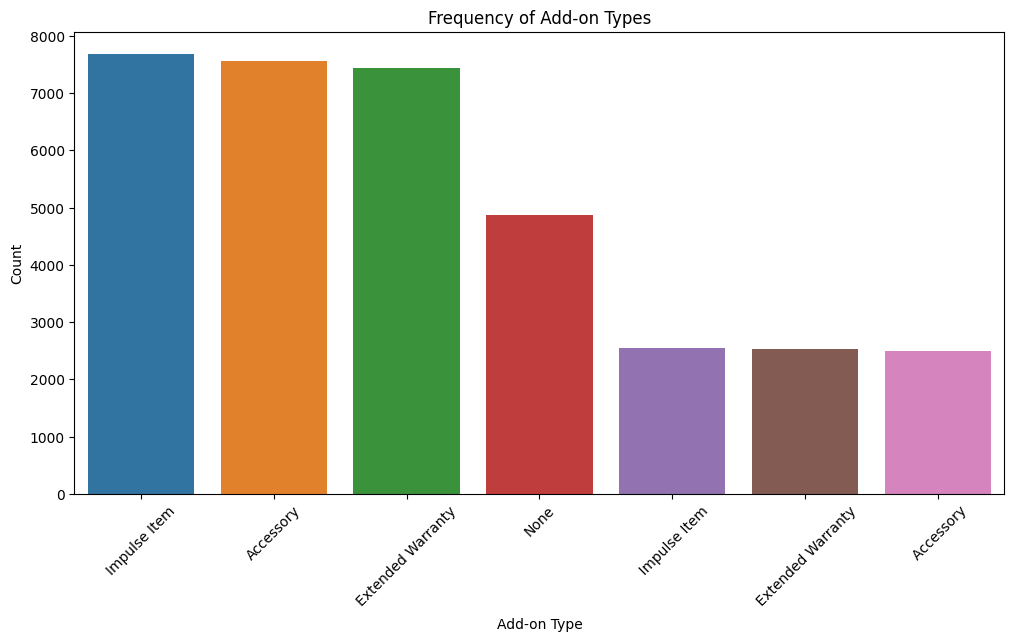

In [30]:
addon_types = electronic_df['Add-ons Purchased'].dropna().str.split(',').explode().value_counts().reset_index()
addon_types.columns = ['Add-on Type', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Add-on Type', y='Count', data=addon_types)
plt.title('Frequency of Add-on Types')
plt.xlabel('Add-on Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Code: Identify Customers Who Frequently Purchase Add-ons

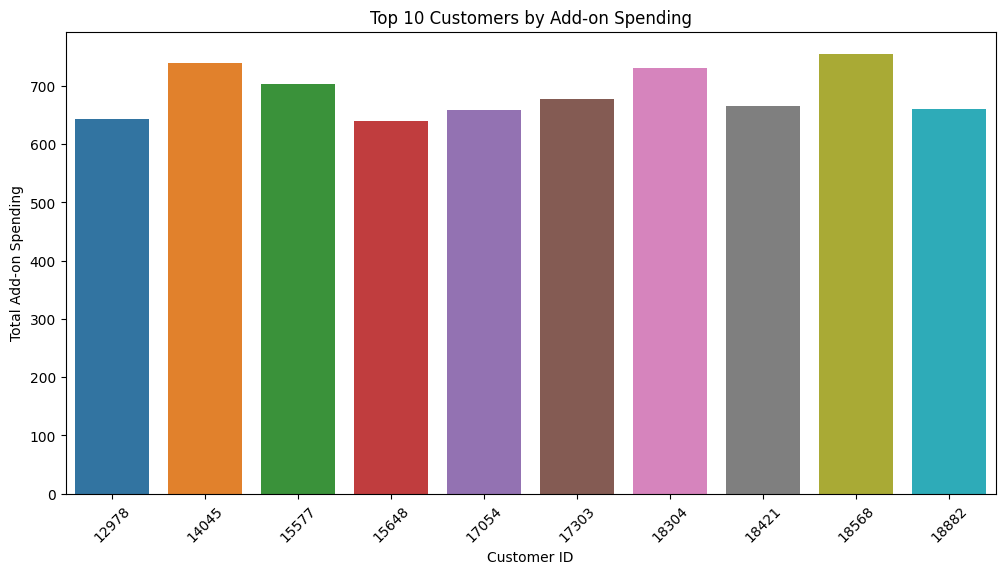

In [51]:
customer_addon_stats = electronic_df[electronic_df['Has Add-ons']].groupby('Customer ID')['Add-on Total'].agg(['count', 'sum']).reset_index()
customer_addon_stats.columns = ['Customer ID', 'Add-on Purchase Count', 'Total Add-on Spending']

top_addon_customers = customer_addon_stats.sort_values(by='Total Add-on Spending', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='Total Add-on Spending', data=top_addon_customers)
plt.title('Top 10 Customers by Add-on Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Add-on Spending')
plt.xticks(rotation=45)
plt.show()


2. Add-on Revenue
Code: Analyze Contribution of Add-ons to Overall Revenue

Add-ons contribute 1.96% to the overall revenue.


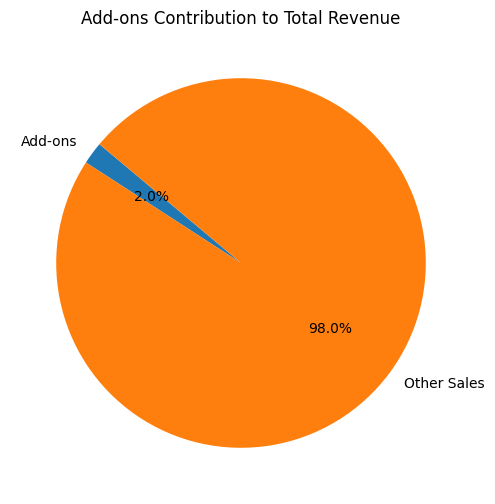

In [52]:
total_addon_revenue = electronic_df['Add-on Total'].sum()
overall_revenue = electronic_df['Total Price'].sum()
addon_contribution = (total_addon_revenue / overall_revenue) * 100

print(f"Add-ons contribute {addon_contribution:.2f}% to the overall revenue.")

revenue_data = pd.DataFrame({
    'Category': ['Add-ons', 'Other Sales'],
    'Revenue': [total_addon_revenue, overall_revenue - total_addon_revenue]
})

plt.figure(figsize=(8, 6))
plt.pie(revenue_data['Revenue'], labels=revenue_data['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Add-ons Contribution to Total Revenue')
plt.show()


Code: Correlation Between Add-ons and Product Types

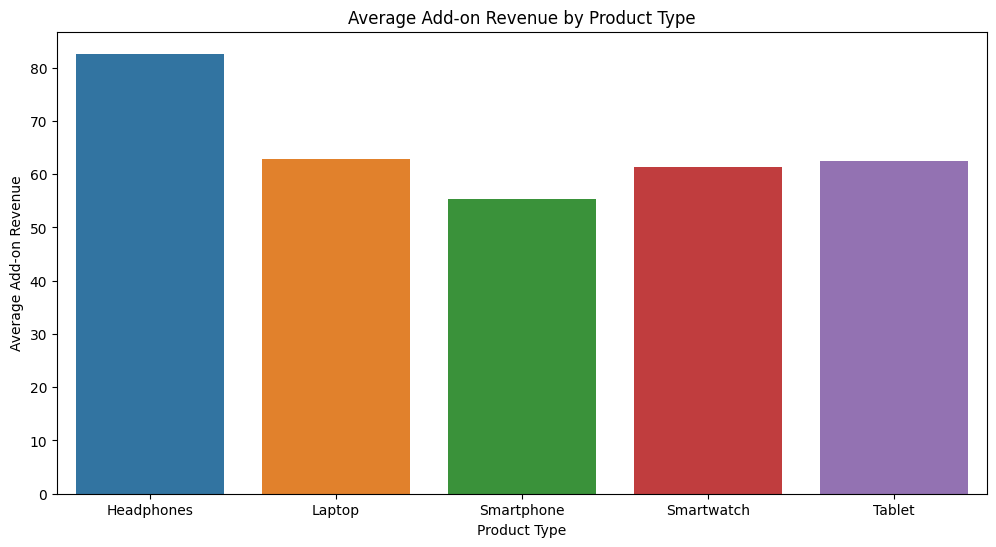

In [53]:
addon_product_stats = electronic_df.groupby('Product Type')['Add-on Total'].mean().reset_index()
addon_product_stats.columns = ['Product Type', 'Average Add-on Revenue']

plt.figure(figsize=(12, 6))
sns.barplot(x='Product Type', y='Average Add-on Revenue', data=addon_product_stats)
plt.title('Average Add-on Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Add-on Revenue')
plt.show()


------------------ NEW ANALYSIS BLOCK (8)------------------------------

8. Statistical Relationships

In [54]:
print("\nDescriptive Statistics:")
print(electronic_df.describe())


print("\nMeasures of Central Tendency and Dispersion:")
for column in electronic_df.select_dtypes(include=np.number).columns:
    mean = electronic_df[column].mean()
    median = electronic_df[column].median()
    std_dev = electronic_df[column].std()
    print(f"{column}: Mean = {mean:.2f}, Median = {median:.2f}, Std Dev = {std_dev:.2f}")



Descriptive Statistics:
        Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133419    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total         Month  
count  20000.000000  20000.000000  20000.000000  
mean       5.485550     62.244848      5.710000  
std        2.870854     58.058431      3.118732  
min        1.000000      0.000000      1.000000  
25%        3.

In [98]:
from scipy.stats import ttest_ind

loyalty_spending = electronic_df[electronic_df['Loyalty Member'] == 'Yes']['Total Price']
non_loyalty_spending = electronic_df[electronic_df['Loyalty Member'] == 'No']['Total Price']

t_stat, p_value = ttest_ind(loyalty_spending, non_loyalty_spending)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in spending between loyalty members and non-members is statistically significant.")
else:
    print("The difference in spending between loyalty members and non-members is not statistically significant.")


T-statistic: -1.25
P-value: 0.2115
The difference in spending between loyalty members and non-members is not statistically significant.


Code: Test if Ratings Differ Across Product Types

In [99]:
from scipy.stats import f_oneway

rating_groups = [group['Rating'].values for _, group in electronic_df.groupby('Product Type')]

f_stat, p_value = f_oneway(*rating_groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in ratings across product types is statistically significant.")
else:
    print("The difference in ratings across product types is not statistically significant.")


F-statistic: 73.50
P-value: 0.0000
The difference in ratings across product types is statistically significant.


RANDOM SAMPLING OF DATA

In [100]:
random_sample = electronic_df.sample(frac=0.1, random_state=42)

print(random_sample.describe())


        Customer ID          Age       Rating   Total Price   Unit Price  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean   10452.275500    49.051500     3.106500   3103.186120   571.914390   
std     5611.018935    17.906344     1.238517   2562.073275   316.231118   
min     1002.000000    18.000000     1.000000     20.750000    20.750000   
25%     5478.750000    34.000000     2.000000    988.120000   361.180000   
50%     9829.500000    49.000000     3.000000   2421.935000   463.960000   
75%    15498.500000    64.000000     4.000000   4639.600000   791.190000   
max    19997.000000    80.000000     5.000000  11396.800000  1139.680000   

          Quantity  Add-on Total  
count  2000.000000   2000.000000  
mean      5.369500     60.000690  
std       2.831427     56.209843  
min       1.000000      0.000000  
25%       3.000000      0.000000  
50%       5.000000     50.295000  
75%       8.000000     90.560000  
max      10.000000    274.480000  


In [103]:
full_stats = electronic_df['Total Price'].describe()
random_sample_stats = random_sample['Total Price'].describe()

comparison = pd.DataFrame({
    "Full Dataset": full_stats,
    "Random Sample": random_sample_stats
})

print(comparison)


       Full Dataset  Random Sample
count  20000.000000    2000.000000
mean    3180.133419    3103.186120
std     2544.978675    2562.073275
min       20.750000      20.750000
25%     1139.680000     988.120000
50%     2534.490000    2421.935000
75%     4639.600000    4639.600000
max    11396.800000   11396.800000


In [104]:
if 'Quantity' in electronic_df.columns:
    t_stat, p_value = stats.ttest_1samp(electronic_df['Quantity'], 6)
    print("\nOne-Sample T-Test (Quantity mean = 6):")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("Result: Reject the null hypothesis. The mean Quantity is significantly different from 6.")
    else:
        print("Result: Fail to reject the null hypothesis.")



One-Sample T-Test (Quantity mean = 6):
T-statistic: -25.342, P-value: 0.000
Result: Reject the null hypothesis. The mean Quantity is significantly different from 6.


In [64]:
from sklearn.linear_model import LinearRegression


In [105]:
# Relationship between "Unit Price" and "Quantity" via linear regression
if 'Unit Price' in electronic_df.columns and 'Quantity' in electronic_df.columns:
    X = electronic_df[['Unit Price']].dropna()
    y = electronic_df['Quantity'].dropna()
    model = LinearRegression()
    model.fit(X, y)
    print("\nLinear Regression (Quantity ~ Unit Price):")
    print(f"Intercept: {model.intercept_:.3f}")
    print(f"Coefficient: {model.coef_[0]:.3f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Unit Price', y='Quantity', data=electronic_df)
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.title('Linear Regression: Unit Price vs Quantity')
    plt.xlabel('Unit Price')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()


NameError: name 'LinearRegression' is not defined